In [50]:
from google.colab import drive
from matplotlib import image
import matplotlib.pyplot as plt
from PIL import Image
from math import *
from random import *
import numpy as np
import copy

# Nb de permutations

In [ ]:
def sum_fact(n):
  s = 0
  for i in range(1,n+1):
    s = s+log10(i)
  return s

def log10_nb_comb(n):
  if(n%2 == 1):
    x = sum_fact(7)+6*log10(3)+((n*n-2*n-3)/4)*sum_fact(24)+log10(24)+sum_fact(12)+10*log10(2)
    y = (6*((n-2)*(n-2)-1)/4)*sum_fact(4)
    return x-y
  else:
    x = sum_fact(7)+6*log10(3)+((n*n-2*n-3)/4)*sum_fact(24)
    y = (6*(n-2)*(n-2)/4)*sum_fact(4)
    return x-y

print(log10_nb_comb(17))

1054.8254862323695


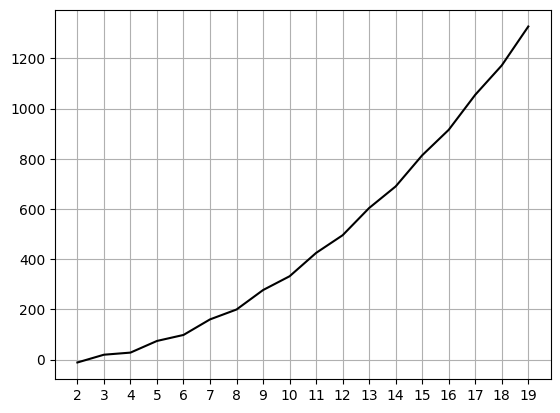

In [ ]:
x = list(range(2,20))
y = [log10_nb_comb(i) for i in range(2,20)]

plt.xticks(x,x)
plt.plot(x, y,"-k")
plt.grid()

plt.show()

#Mélange

## Classes Move/RandomMove

In [85]:
class Move:

  def __init__(self, m):

    self.move = m

  def is_wide(self):
    for i in range(len(self.move)):
      if self.move[i] == 'w':
        return True
    return False

  def nb_turn(self):
    if self.move[-1] == "'" :
      return 3
    elif self.move[-1] == '2' :
      return 2
    else:
      return 1

  def nb_w(self):
    s = ""
    i = 0
    while self.move[i].isdigit():
      s = s+self.move[i]
      i = i+1

    if s == "" :
      if self.is_wide():
        return 2
      else:
        return 1
    else : return int(s)

  def ext_sgl_move(self):
    i = 0
    while self.move[i].isdigit():
      i = i+1
    return self.move[i]

  def return_move(self):
    return self.move

  def print_move(self):
    print(self.move)


class RandomMove:

  def __init__(self, size_puzzle):

    all = []

    T = [Move("U"),Move("D"),Move("R"),Move("L"),Move("F"),Move("B")]
    tmp = []
    tmp2 = T

    if(size_puzzle == 2):

      all = [Move("U"),Move("U2"),Move("U'"),Move("F"),Move("F2"),Move("F'"),Move("R"),Move("R'"),Move("R2")]


    elif(size_puzzle >= 4):

      for i in range(2,int(size_puzzle//2)+1):
        for j in range(len(T)):
          tmp.append(Move(str(i)+T[j].move+"w"))

      for k in range(len(tmp)):
        tmp2.append(Move(tmp[k].move))
        tmp2.append(Move(tmp[k].move+"'"))
        tmp2.append(Move(tmp[k].move+"2"))

      all = tmp2

    else:

      for k in range(len(T)):

        tmp.append(Move(T[k].move))
        tmp.append(Move(T[k].move+"'"))
        tmp.append(Move(T[k].move+"2"))

      all = tmp

    n = len(all) - 1
    x = randint(0, n-1)
    self.random_move = all[x]

## Classe Scramble

In [86]:
# 2x2 : 45 moves
# 3x3 : 60 moves
# 4x4 : 45 moves
# 5x5 : 60 moves
# 6x6 : 80 moves
# 7x7 : 100 moves
# 8x8 : 120 moves
# 9x9 : 140 moves
# 10x10 : 160 moves
# 11x11 : 180 moves
# 12x12 : 200 moves
# 13x13 : 220 moves
# 14x14 : 240 moves
# 15x15 : 260 moves
# 16x16 : 280 moves
# 17x17 : 300 moves

class Scramble:

  def __init__(self, size_puzzle, size_scr):

    self.size = size_scr

    self.scr = []
    y = RandomMove(size_puzzle).random_move
    self.scr.append(y)

    len_scr = 1

    while(len_scr < size_scr):
      new = RandomMove(size_puzzle).random_move

      if(new.nb_w() != y.nb_w() or  new.ext_sgl_move() != y.ext_sgl_move()):
        self.scr.append(new)
        y = new
        len_scr = len_scr + 1

  def return_scr(self):
    s = ""
    for i in range(len(self.scr)):
      s = s+self.scr[i].return_move()+" "
    return s

  def print_scr(self):
    print(self.return_scr())

s = Scramble(2,10)
s.print_scr()

U2 F2 U F U R U2 R F U' 


In [ ]:
text = "D2 R2 F L2 U2 F D2 B' L2 R2 F2 R2 L' U L D2 F2 D' R2 U2 F' Fw2 U' R2 Rw2 B U Rw2 U D2 F' D B' L Rw' F2 Rw' B D Uw L' Fw Uw Fw Uw R'"
result = len(text.split())
print(result)

46


## Classe Image

In [88]:
drive.mount('/content/drive')

Colors = ['Blanc','Jaune','Bleu','Orange','Vert','Rouge']
ColorsRGB = [[255,255,255],[255,255,0],[0,0,255],[255,127,0],[0,255,0],[255,0,0]]

def color_pixel(rgb_pixel_value):
  L = []
  for i in range(6):
    L.append(abs(rgb_pixel_value[0]-ColorsRGB[i][0])+abs(rgb_pixel_value[1]-ColorsRGB[i][1])+abs(rgb_pixel_value[2]-ColorsRGB[i][2]))
  min_value = min(L)
  min_index = L.index(min_value)
  return Colors[min_index]

class ImageFace:

  def __init__(self, image_path, taille):

    self.taille = taille

    image = Image.open(image_path)
    image_rgb = image.convert("RGB")

    taille_image = image.size[0]
    diff = taille_image/taille
    deb = diff/2

    self.pict = []
    for i in range(taille):
      L = []
      for j in range(taille):
        rgbpv = image_rgb.getpixel((floor(deb+diff*j),floor(deb+diff*i)))
        L.append(color_pixel(rgbpv))
      self.pict.append(L)

  def print_im(self):
    print(self.pict)

class ImageCube:

  def __init__(self, file_path, taille):

    self.ImageWhite = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/White.png",taille)
    self.ImageBlue = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Blue.png",taille)
    self.ImageOrange = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Orange.png",taille)
    self.ImageGreen = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Green.png",taille)
    self.ImageRed = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Red.png",taille)
    self.ImageYellow = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Yellow.png",taille)

If = ImageFace("/content/drive/My Drive/RubiksCube/rubik33/Yellow.png",3)
Ic = ImageCube("rubik33",3)

Mounted at /content/drive


## Classe Rubik

In [91]:
def swap_coord(s,t,p,q):
    tmp = s[p[0]][p[1]]
    s[p[0]][p[1]] = t[q[0]][q[1]]
    t[q[0]][q[1]] = tmp

def num_size(s):
  if(s%2 ==0): return ((s-2)*(s-2))//4
  else: return ((s-2)*(s-2)-1)//4

def all_coord(size):
  s = size-2
  n = num_size(size)
  T = np.empty((n,4,2),dtype='int')
  k = 0
  x = s
  a = []
  b = []
  c = []
  d = []
  for j in range(s//2):
    for i in range(x-1):
      T[k][0][0] = j+1
      T[k][0][1] = i+j+1

      T[k][1][0] = i+j+1
      T[k][1][1] = s-j

      T[k][2][0] = s-j
      T[k][2][1] = s-i-j

      T[k][3][0] = s-i-j
      T[k][3][1] = j+1

      k = k+1
    x = x-2
  return T

class Rubik:

  def __init__(self, size):

    self.size = size

    self.WhiteFace = np.empty((size,size),dtype='object')
    self.BlueFace = np.empty((size,size),dtype='object')
    self.OrangeFace = np.empty((size,size),dtype='object')
    self.GreenFace = np.empty((size,size),dtype='object')
    self.RedFace = np.empty((size,size),dtype='object')
    self.YellowFace = np.empty((size,size),dtype='object')

    for i in range(size):
      for j in range(size):
        self.WhiteFace[i][j] = 'Blanc'
        self.BlueFace[i][j] = 'Bleu'
        self.OrangeFace[i][j] = 'Orange'
        self.GreenFace[i][j] = 'Vert'
        self.RedFace[i][j] = 'Rouge'
        self.YellowFace[i][j] = 'Jaune'

  def print_cube(self):

    tmp = self.good_orientation()

    print(np.matrix(tmp.WhiteFace))
    print("\n")
    print(np.matrix(tmp.BlueFace))
    print("\n")
    print(np.matrix(tmp.OrangeFace))
    print("\n")
    print(np.matrix(tmp.GreenFace))
    print("\n")
    print(np.matrix(tmp.RedFace))
    print("\n")
    print(np.matrix(tmp.YellowFace))

  def swap_own(self,Face):

    s = self.size

    tc = all_coord(s)
    n = int(s-1)

    for i in range(n):
      swap_coord(Face,Face,[0,i],[i,n])
      swap_coord(Face,Face,[0,i],[n,n-i])
      swap_coord(Face,Face,[0,i],[n-i,0])

    for i in range(num_size(s)):
      swap_coord(Face,Face,tc[i][0],tc[i][1])
      swap_coord(Face,Face,tc[i][0],tc[i][2])
      swap_coord(Face,Face,tc[i][0],tc[i][3])

  def apply_U_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.WhiteFace)

    if(slice == s):
      self.apply_D_move(1,nb_t)
      self.apply_D_move(1,nb_t)
      self.apply_D_move(1,nb_t)

    else:
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.OrangeFace,self.BlueFace,[sl,i],[sl,i])
          swap_coord(self.OrangeFace,self.RedFace,[sl,i],[sl,i])
          swap_coord(self.OrangeFace,self.GreenFace,[sl,i],[sl,i])

  def apply_D_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.YellowFace)

    if(slice == s):
      self.apply_U_move(1,nb_t)
      self.apply_U_move(1,nb_t)
      self.apply_U_move(1,nb_t)

    else:
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.OrangeFace,self.GreenFace,[n-sl,i],[n-sl,i])
          swap_coord(self.OrangeFace,self.RedFace,[n-sl,i],[n-sl,i])
          swap_coord(self.OrangeFace,self.BlueFace,[n-sl,i],[n-sl,i])

  def apply_R_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.OrangeFace)

    if(slice == s):
      self.apply_L_move(1,nb_t)
      self.apply_L_move(1,nb_t)
      self.apply_L_move(1,nb_t)

    else:
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.WhiteFace,self.GreenFace,[i,n-sl],[n-i,sl])
          swap_coord(self.WhiteFace,self.YellowFace,[i,n-sl],[i,n-sl])
          swap_coord(self.WhiteFace,self.BlueFace,[i,n-sl],[i,n-sl])

  def apply_L_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.RedFace)

    if(slice == s):
      self.apply_R_move(1,nb_t)
      self.apply_R_move(1,nb_t)
      self.apply_R_move(1,nb_t)

    else :
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.WhiteFace,self.BlueFace,[i,sl],[i,sl])
          swap_coord(self.WhiteFace,self.YellowFace,[i,sl],[i,sl])
          swap_coord(self.WhiteFace,self.GreenFace,[i,sl],[n-i,n-sl])

  def apply_F_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.BlueFace)

    if(slice == s):
      self.apply_B_move(1,nb_t)
      self.apply_B_move(1,nb_t)
      self.apply_B_move(1,nb_t)

    else :
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.WhiteFace,self.OrangeFace,[n-sl,i],[i,sl])
          swap_coord(self.WhiteFace,self.YellowFace,[n-sl,i],[sl,n-i])
          swap_coord(self.WhiteFace,self.RedFace,[n-sl,i],[n-i,n-sl])

  def apply_B_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.GreenFace)

    if(slice == s):
      self.apply_F_move(1,nb_t)
      self.apply_F_move(1,nb_t)
      self.apply_F_move(1,nb_t)

    else :
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.WhiteFace,self.RedFace,[sl,i],[n-i,sl])
          swap_coord(self.WhiteFace,self.YellowFace,[sl,i],[n-sl,n-i])
          swap_coord(self.WhiteFace,self.OrangeFace,[sl,i],[i,n-sl])

  def apply_Uw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_U_move(i,nb_t)

  def apply_Dw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_D_move(i,nb_t)

  def apply_Rw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_R_move(i,nb_t)

  def apply_Lw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_L_move(i,nb_t)

  def apply_Fw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_F_move(i,nb_t)

  def apply_Bw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_B_move(i,nb_t)

  def apply_move(self,m):
    n = m.nb_w()
    nb_t = m.nb_turn()
    sgl_move = m.ext_sgl_move()

    if(sgl_move == 'U'):
      r.apply_Uw_move(n,nb_t)
    elif(sgl_move == 'D'):
      r.apply_Dw_move(n,nb_t)
    elif(sgl_move == 'R'):
      r.apply_Rw_move(n,nb_t)
    elif(sgl_move == 'L'):
      r.apply_Lw_move(n,nb_t)
    elif(sgl_move == 'F'):
      r.apply_Fw_move(n,nb_t)
    elif(sgl_move == 'B'):
      r.apply_Bw_move(n,nb_t)

  def apply_scr(self,scr):
    text = scr.split()
    for i in range(len(text)):
      r.apply_move(Move(text[i]))

  def apply_scr_image(self,file_path):

    Ic = ImageCube(file_path,self.size)

    for i in range(self.size):
      for j in range(self.size):
        self.WhiteFace[i][j] = Ic.ImageWhite.pict[i][j]
        self.BlueFace[i][j] = Ic.ImageBlue.pict[i][j]
        self.OrangeFace[i][j] = Ic.ImageOrange.pict[i][j]
        self.GreenFace[i][j] = Ic.ImageGreen.pict[i][j]
        self.RedFace[i][j] = Ic.ImageRed.pict[i][j]
        self.YellowFace[i][j] = Ic.ImageYellow.pict[i][j]

  def good_orientation(self):

    tmp = copy.deepcopy(self)

    size = tmp.size
    n = int(size//2)
    c1 = tmp.WhiteFace[n][n]
    c2 = tmp.BlueFace[n][n]

    if(size%2 == 1) :

      c1 = tmp.WhiteFace[n][n]
      c2 = tmp.BlueFace[n][n]

      if(c1 == 'Blanc' and c2 == 'Orange') : tmp.apply_Dw_move(size,1)
      elif(c1 == 'Blanc' and c2 == 'Vert') : tmp.apply_Dw_move(size,2)
      elif(c1 == 'Blanc' and c2 == 'Rouge') : tmp.apply_Uw_move(size,1)

      elif(c1 == 'Bleu' and c2 == 'Blanc') :
        tmp.apply_Dw_move(size,2)
        tmp.apply_Lw_move(size,1)
      elif(c1 == 'Bleu' and c2 == 'Rouge') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Lw_move(size,1)
      elif(c1 == 'Bleu' and c2 == 'Jaune') : tmp.apply_Lw_move(size,1)
      elif(c1 == 'Bleu' and c2 == 'Orange') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Lw_move(size,1)

      elif(c1 == 'Orange' and c2 == 'Blanc') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Fw_move(size,1)
      elif(c1 == 'Orange' and c2 == 'Bleu') :
        tmp.apply_Fw_move(size,1)
      elif(c1 == 'Orange' and c2 == 'Jaune') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Fw_move(size,1)
      elif(c1 == 'Orange' and c2 == 'Vert') :
        tmp.apply_Dw_move(size,2)
        tmp.apply_Fw_move(size,1)

      elif(c1 == 'Vert' and c2 == 'Blanc') : tmp.apply_Rw_move(size,1)
      elif(c1 == 'Vert' and c2 == 'Orange') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Rw_move(size,1)
      elif(c1 == 'Vert' and c2 == 'Jaune') :
        tmp.apply_Dw_move(size,2)
        tmp.apply_Rw_move(size,1)
      elif(c1 == 'Vert' and c2 == 'Rouge') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Rw_move(size,1)

      elif(c1 == 'Rouge' and c2 == 'Blanc') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Bw_move(size,1)
      elif(c1 == 'Rouge' and c2 == 'Vert') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Bw_move(size,1)
      elif(c1 == 'Rouge' and c2 == 'Jaune') :
        tmp.apply_Uw_move(size,2)
        tmp.apply_Bw_move(size,1)
      elif(c1 == 'Rouge' and c2 == 'Bleu') : tmp.apply_Bw_move(size,1)

      elif(c1 == 'Jaune' and c2 == 'Bleu') : tmp.apply_Fw_move(size,2)
      elif(c1 == 'Jaune' and c2 == 'Rouge') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Fw_move(size,2)
      elif(c1 == 'Jaune' and c2 == 'Vert') :
        tmp.apply_Uw_move(size,2)
        tmp.apply_Fw_move(size,2)
      elif(c1 == 'Jaune' and c2 == 'Orange') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Fw_move(size,2)

    return tmp

scr = "L D2 R2 B2 F U2 F2 R2 D2 L2 F' L' B2 R' F' D' U' B U' F Fw2 Uw2 L' F Rw2 D2 F2 U2 Uw2 B' R2 D Rw2 Uw' R L' D' B' Fw' U Fw Rw D2 F"

r = Rubik(6)
r.apply_scr_image("rubik66")
r.print_cube()

[['Jaune' 'Blanc' 'Jaune' 'Rouge' 'Rouge' 'Rouge']
 ['Vert' 'Rouge' 'Rouge' 'Bleu' 'Rouge' 'Bleu']
 ['Blanc' 'Blanc' 'Jaune' 'Bleu' 'Blanc' 'Rouge']
 ['Vert' 'Bleu' 'Bleu' 'Bleu' 'Vert' 'Rouge']
 ['Orange' 'Jaune' 'Blanc' 'Rouge' 'Blanc' 'Vert']
 ['Jaune' 'Bleu' 'Orange' 'Rouge' 'Rouge' 'Orange']]


[['Vert' 'Orange' 'Vert' 'Jaune' 'Jaune' 'Blanc']
 ['Blanc' 'Rouge' 'Rouge' 'Jaune' 'Orange' 'Orange']
 ['Vert' 'Rouge' 'Vert' 'Vert' 'Jaune' 'Jaune']
 ['Blanc' 'Vert' 'Blanc' 'Rouge' 'Orange' 'Orange']
 ['Bleu' 'Orange' 'Vert' 'Vert' 'Bleu' 'Blanc']
 ['Bleu' 'Vert' 'Bleu' 'Bleu' 'Blanc' 'Orange']]


[['Bleu' 'Jaune' 'Blanc' 'Bleu' 'Jaune' 'Blanc']
 ['Jaune' 'Orange' 'Blanc' 'Bleu' 'Jaune' 'Bleu']
 ['Orange' 'Vert' 'Jaune' 'Vert' 'Jaune' 'Orange']
 ['Blanc' 'Jaune' 'Bleu' 'Blanc' 'Vert' 'Jaune']
 ['Orange' 'Jaune' 'Bleu' 'Orange' 'Vert' 'Orange']
 ['Blanc' 'Rouge' 'Blanc' 'Bleu' 'Bleu' 'Jaune']]


[['Vert' 'Jaune' 'Bleu' 'Rouge' 'Bleu' 'Vert']
 ['Orange' 'Vert' 'Orange' 'Rouge' 'Blanc' 'Rou

# Extraction

In [54]:
def convert_corners_to_letter(c1,c2):
  if(c1=='Blanc'):
    if(c2=='Rouge'): return 'A'
    if(c2=='Vert'): return 'B'
    if(c2=='Orange'): return 'C'
    if(c2=='Bleu'): return 'D'

  if(c1=='Bleu'):
    if(c2=='Rouge'): return 'E'
    if(c2=='Blanc'): return 'F'
    if(c2=='Orange'): return 'G'
    if(c2=='Jaune'): return 'H'

  if(c1=='Orange'):
    if(c2=='Bleu'): return 'I'
    if(c2=='Blanc'): return 'J'
    if(c2=='Vert'): return 'K'
    if(c2=='Jaune'): return 'L'

  if(c1=='Vert'):
    if(c2=='Orange'): return 'M'
    if(c2=='Blanc'): return 'N'
    if(c2=='Rouge'): return 'O'
    if(c2=='Jaune'): return 'P'

  if(c1=='Rouge'):
    if(c2=='Vert'): return 'Q'
    if(c2=='Blanc'): return 'R'
    if(c2=='Bleu'): return 'S'
    if(c2=='Jaune'): return 'T'

  if(c1=='Jaune'):
    if(c2=='Rouge'): return 'U'
    if(c2=='Bleu'): return 'V'
    if(c2=='Orange'): return 'W'
    if(c2=='Vert'): return 'X'

def convert_edges_to_letter(c1,c2):
  if(c1=='Blanc'):
    if(c2=='Vert'): return 'A'
    if(c2=='Orange'): return 'B'
    if(c2=='Bleu'): return 'C'
    if(c2=='Rouge'): return 'D'

  if(c1=='Bleu'):
    if(c2=='Blanc'): return 'E'
    if(c2=='Orange'): return 'F'
    if(c2=='Jaune'): return 'G'
    if(c2=='Rouge'): return 'H'

  if(c1=='Orange'):
    if(c2=='Blanc'): return 'I'
    if(c2=='Vert'): return 'J'
    if(c2=='Jaune'): return 'K'
    if(c2=='Bleu'): return 'L'

  if(c1=='Vert'):
    if(c2=='Blanc'): return 'M'
    if(c2=='Rouge'): return 'N'
    if(c2=='Jaune'): return 'O'
    if(c2=='Orange'): return 'P'

  if(c1=='Rouge'):
    if(c2=='Blanc'): return 'Q'
    if(c2=='Bleu'): return 'R'
    if(c2=='Jaune'): return 'S'
    if(c2=='Vert'): return 'T'

  if(c1=='Jaune'):
    if(c2=='Bleu'): return 'U'
    if(c2=='Orange'): return 'V'
    if(c2=='Vert'): return 'W'
    if(c2=='Rouge'): return 'X'

def conv_center(t):
  T = []
  for i in range(len(t)):
    if(t[i]=='Blanc'): T.append(0)
    elif(t[i]=='Bleu'): T.append(1)
    elif(t[i]=='Orange'): T.append(2)
    elif(t[i]=='Vert'): T.append(3)
    elif(t[i]=='Rouge'): T.append(4)
    elif(t[i]=='Jaune'): T.append(5)
  return T

#print(all_coord(6))

class RubikExtract:

  def __init__(self, rubik):

    self.size = rubik.size

    # Coins

    self.Corners = []
    n = int(self.size - 1)
    self.Corners.append(convert_corners_to_letter(rubik.WhiteFace[0][0],rubik.RedFace[0][0]))
    self.Corners.append(convert_corners_to_letter(rubik.WhiteFace[0][n],rubik.GreenFace[0][0]))
    self.Corners.append(convert_corners_to_letter(rubik.WhiteFace[n][n],rubik.OrangeFace[0][0]))
    self.Corners.append(convert_corners_to_letter(rubik.WhiteFace[n][0],rubik.BlueFace[0][0]))

    self.Corners.append(convert_corners_to_letter(rubik.BlueFace[0][0],rubik.RedFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.BlueFace[0][n],rubik.WhiteFace[n][n]))
    self.Corners.append(convert_corners_to_letter(rubik.BlueFace[n][n],rubik.OrangeFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.BlueFace[n][0],rubik.YellowFace[0][0]))

    self.Corners.append(convert_corners_to_letter(rubik.OrangeFace[0][0],rubik.BlueFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.OrangeFace[0][n],rubik.WhiteFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.OrangeFace[n][n],rubik.GreenFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.OrangeFace[n][0],rubik.YellowFace[0][n]))

    self.Corners.append(convert_corners_to_letter(rubik.GreenFace[0][0],rubik.OrangeFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.GreenFace[0][n],rubik.WhiteFace[0][0]))
    self.Corners.append(convert_corners_to_letter(rubik.GreenFace[n][n],rubik.RedFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.GreenFace[n][0],rubik.YellowFace[n][n]))

    self.Corners.append(convert_corners_to_letter(rubik.RedFace[0][0],rubik.GreenFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.RedFace[0][n],rubik.WhiteFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.RedFace[n][n],rubik.BlueFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.RedFace[n][0],rubik.YellowFace[n][0]))

    self.Corners.append(convert_corners_to_letter(rubik.YellowFace[0][0],rubik.RedFace[n][n]))
    self.Corners.append(convert_corners_to_letter(rubik.YellowFace[0][n],rubik.BlueFace[n][n]))
    self.Corners.append(convert_corners_to_letter(rubik.YellowFace[n][n],rubik.OrangeFace[n][n]))
    self.Corners.append(convert_corners_to_letter(rubik.YellowFace[n][0],rubik.GreenFace[n][n]))

    # Edges

    self.Edges = []
    n_edge_type = int((self.size - 1)//2)

    for i in range(n_edge_type):
      v = []

      a = int(self.size//2+i)
      b = int((self.size-1)//2-i)
      c = int(self.size-1)

      v.append(convert_edges_to_letter(rubik.WhiteFace[0][a],rubik.GreenFace[0][b]))
      v.append(convert_edges_to_letter(rubik.WhiteFace[a][c],rubik.OrangeFace[0][b]))
      v.append(convert_edges_to_letter(rubik.WhiteFace[c][b],rubik.BlueFace[0][b]))
      v.append(convert_edges_to_letter(rubik.WhiteFace[b][0],rubik.RedFace[0][b]))

      v.append(convert_edges_to_letter(rubik.BlueFace[0][a],rubik.WhiteFace[c][a]))
      v.append(convert_edges_to_letter(rubik.BlueFace[a][c],rubik.OrangeFace[a][0]))
      v.append(convert_edges_to_letter(rubik.BlueFace[c][b],rubik.YellowFace[0][b]))
      v.append(convert_edges_to_letter(rubik.BlueFace[b][0],rubik.RedFace[b][c]))

      v.append(convert_edges_to_letter(rubik.OrangeFace[0][a],rubik.WhiteFace[b][c]))
      v.append(convert_edges_to_letter(rubik.OrangeFace[a][c],rubik.GreenFace[a][0]))
      v.append(convert_edges_to_letter(rubik.OrangeFace[c][b],rubik.YellowFace[b][c]))
      v.append(convert_edges_to_letter(rubik.OrangeFace[b][0],rubik.BlueFace[b][c]))

      v.append(convert_edges_to_letter(rubik.GreenFace[0][a],rubik.WhiteFace[0][b]))
      v.append(convert_edges_to_letter(rubik.GreenFace[a][c],rubik.RedFace[a][0]))
      v.append(convert_edges_to_letter(rubik.GreenFace[c][b],rubik.YellowFace[c][a]))
      v.append(convert_edges_to_letter(rubik.GreenFace[b][0],rubik.OrangeFace[b][c]))

      v.append(convert_edges_to_letter(rubik.RedFace[0][a],rubik.WhiteFace[a][0]))
      v.append(convert_edges_to_letter(rubik.RedFace[a][c],rubik.BlueFace[a][0]))
      v.append(convert_edges_to_letter(rubik.RedFace[c][b],rubik.YellowFace[a][0]))
      v.append(convert_edges_to_letter(rubik.RedFace[b][0],rubik.GreenFace[b][c]))

      v.append(convert_edges_to_letter(rubik.YellowFace[0][a],rubik.BlueFace[c][a]))
      v.append(convert_edges_to_letter(rubik.YellowFace[a][c],rubik.OrangeFace[c][a]))
      v.append(convert_edges_to_letter(rubik.YellowFace[c][b],rubik.GreenFace[c][a]))
      v.append(convert_edges_to_letter(rubik.YellowFace[b][0],rubik.RedFace[c][a]))

      self.Edges.append(v)

    # Centres

    self.Centers = []
    n_center_type = num_size(self.size)

    for i in range(n_center_type):

      ct = all_coord(self.size)[i]
      T = []

      T.append(rubik.WhiteFace[ct[0][0]][ct[0][1]])
      T.append(rubik.WhiteFace[ct[1][0]][ct[1][1]])
      T.append(rubik.WhiteFace[ct[2][0]][ct[2][1]])
      T.append(rubik.WhiteFace[ct[3][0]][ct[3][1]])

      T.append(rubik.BlueFace[ct[0][0]][ct[0][1]])
      T.append(rubik.BlueFace[ct[1][0]][ct[1][1]])
      T.append(rubik.BlueFace[ct[2][0]][ct[2][1]])
      T.append(rubik.BlueFace[ct[3][0]][ct[3][1]])

      T.append(rubik.OrangeFace[ct[0][0]][ct[0][1]])
      T.append(rubik.OrangeFace[ct[1][0]][ct[1][1]])
      T.append(rubik.OrangeFace[ct[2][0]][ct[2][1]])
      T.append(rubik.OrangeFace[ct[3][0]][ct[3][1]])

      T.append(rubik.GreenFace[ct[0][0]][ct[0][1]])
      T.append(rubik.GreenFace[ct[1][0]][ct[1][1]])
      T.append(rubik.GreenFace[ct[2][0]][ct[2][1]])
      T.append(rubik.GreenFace[ct[3][0]][ct[3][1]])

      T.append(rubik.RedFace[ct[0][0]][ct[0][1]])
      T.append(rubik.RedFace[ct[1][0]][ct[1][1]])
      T.append(rubik.RedFace[ct[2][0]][ct[2][1]])
      T.append(rubik.RedFace[ct[3][0]][ct[3][1]])

      T.append(rubik.YellowFace[ct[0][0]][ct[0][1]])
      T.append(rubik.YellowFace[ct[1][0]][ct[1][1]])
      T.append(rubik.YellowFace[ct[2][0]][ct[2][1]])
      T.append(rubik.YellowFace[ct[3][0]][ct[3][1]])

      self.Centers.append(conv_center(T))

  def CornerExtract(self):
    return self.Corners

  def EdgeExtract(self,type):
    return self.Edges[type]

  def CenterExtract(self,type):
    return self.Centers[type]

scr = "U 2Dw 2Rw 2Lw2 R 2Rw' 2Dw' F 2Uw2 2Lw 2Rw2 2Uw' 2Rw' F U 2Bw' 2Lw 2Fw' 2Lw2 B"

r = Rubik(4)
#r.apply_scr(scr)

E = RubikExtract(r)
print(E.CenterExtract(0))

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5]


#Résolution



## SolveWing

In [55]:
def swap(liste,p,q):
  tmp = liste[p]
  liste[p] = liste[q]
  liste[q] = tmp

class SolveWing:

  def __init__(self,W):

    self.array_wing = W

  def all_wing_solved(self):
    for i in range(24):
      base = ord(self.array_wing[i]) - 65
      if(base != i):
          return False
    return True

  def nouveau_cycle_wing(self):
    for i in range(24):
      base = ord(self.array_wing[i]) - 65
      if(base != i):
        return i
    return -1

  def solve_wing(self):

    tmp = SolveWing([c for c in self.array_wing])
    T = []
    buffer = tmp.array_wing[20]

    if(tmp.array_wing[20] != 'U'):
      while True:
        T.append(tmp.array_wing[20])
        swap(tmp.array_wing,ord(buffer)-65,20)
        buffer = tmp.array_wing[20]
        if tmp.array_wing[20] == 'U':
          break
    if(tmp.all_wing_solved()):
      return T
    else:
      while True:
        buffer = tmp.nouveau_cycle_wing()
        j = chr(buffer+65)
        T.append(j)
        swap(tmp.array_wing,buffer,20)
        while True:
          T.append(tmp.array_wing[20])
          buffer = tmp.array_wing[20]
          swap(tmp.array_wing,ord(buffer)-65,20)
          if(tmp.array_wing[20] == 'U'):
            break
        if(tmp.all_wing_solved()):
          break

      return T


scr = "U 2Dw 2Rw 2Lw2 R 2Rw' 2Dw' F 2Uw2 2Lw 2Rw2 2Uw' 2Rw' F U 2Bw' 2Lw 2Fw' 2Lw2 B"

r = Rubik(4)
r.apply_scr(scr)
#r.print_cube()

E = RubikExtract(r)
SW = SolveWing(E.EdgeExtract(0))
print(SW.solve_wing())

['Q', 'V', 'K', 'D', 'M', 'C', 'J', 'T', 'I', 'L', 'E', 'B', 'R', 'F', 'H', 'A', 'G', 'O', 'N', 'P', 'W', 'X']


## SolveEdge

In [56]:
def convert_edges(c):

  if(c == 'A'): return 'M'
  if(c == 'B'): return 'I'
  if(c == 'C'): return 'E'
  if(c == 'D'): return 'Q'

  if(c == 'E'): return 'C'
  if(c == 'F'): return 'L'
  if(c == 'G'): return 'U'
  if(c == 'H'): return 'R'

  if(c == 'I'): return 'B'
  if(c == 'J'): return 'P'
  if(c == 'K'): return 'V'
  if(c == 'L'): return 'F'

  if(c == 'M'): return 'A'
  if(c == 'N'): return 'T'
  if(c == 'O'): return 'W'
  if(c == 'P'): return 'J'

  if(c == 'Q'): return 'D'
  if(c == 'R'): return 'H'
  if(c == 'S'): return 'X'
  if(c == 'T'): return 'N'

  if(c == 'U'): return 'G'
  if(c == 'V'): return 'K'
  if(c == 'W'): return 'O'
  if(c == 'X'): return 'S'

  else: return 'Z'

def swap_edges(v):
  base = ord(v[20]) - 65
  hom_1 = ord(convert_edges(v[20])) - 65

  swap(v,20,base)
  swap(v,6,hom_1)

class SolveEdge:

  def __init__(self,E):

    self.array_edge = E

  def cube_solved_flip(self):
    for i in range(24):
      base = ord(self.array_edge[i]) - 65
      hom_1 = ord(convert_edges(self.array_edge[i])) - 65
      if(base != i and hom_1 != i):
        return False
    return True

  def cube_solved_edge(self):
    for i in range(24):
      base = ord(self.array_edge[i]) - 65
      if(base != i):
          return False
    return True

  def find_not_solved_edge(self):
    for i in range(24):
      base = ord(self.array_edge[i]) - 65
      hom_1 = ord(convert_edges(self.array_edge[i])) - 65
      if(i != base and i != hom_1 and i != 6  and i != 20):
          return i
    return -1


  def find_flip(self):
    for i in range(24):
      base = ord(self.array_edge[i]) - 65;
      hom_1 = ord(convert_edges(self.array_edge[i]) )- 65;
      if(i == hom_1 and i != 6  and i != 20):
        return i
    return -1

  def solve_edge(self):

    tmp = SolveEdge([c for c in self.array_edge])
    vect = []
    while(tmp.array_edge[20] != 'U' and tmp.array_edge[20] != 'G'):
      vect.append(tmp.array_edge[20])
      swap_edges(tmp.array_edge)

    if(tmp.cube_solved_edge()): return vect

    if(not tmp.cube_solved_flip()):

      while(not tmp.cube_solved_flip()):

        k = tmp.find_not_solved_edge()
        j = chr(k+65)
        c = tmp.array_edge[k]
        hom_1 = ord(convert_edges(j)) - 65

        swap(tmp.array_edge,20,k)
        swap(tmp.array_edge,6,hom_1)

        vect.append(chr(k+65))

        while(tmp.array_edge[20] != 'U' and tmp.array_edge[20] != 'G'):

          vect.append(tmp.array_edge[20]);
          swap_edges(tmp.array_edge)

    if(tmp.cube_solved_edge()): return vect

    while(not tmp.cube_solved_edge()):

      k = tmp.find_flip()
      j = chr(k+65)
      c = tmp.array_edge[k];
      hom_1 = ord(convert_edges(j)) - 65

      swap(tmp.array_edge,20,k)
      swap(tmp.array_edge,6,hom_1)

      vect.append(chr(k+65))
      vect.append(tmp.array_edge[20])
      swap_edges(tmp.array_edge)

    return vect

scr = "L2 D2 F' L2 R2 D2 F' D' R' U D' R' D' R' F R' B U B' U2"

r = Rubik(3)
r.apply_scr(scr)
#r.print_cube()

E = RubikExtract(r)
SE = SolveEdge(E.EdgeExtract(0))
print(SE.solve_edge())

['N', 'E', 'K', 'O', 'S', 'A', 'R', 'D', 'M', 'B', 'L', 'I']


## SolveCorner

In [57]:
def convert_corners(c):

  if(c == 'A'): return 'Q'
  if(c == 'B'): return 'M'
  if(c == 'C'): return 'I'
  if(c == 'D'): return 'E'

  if(c == 'E'): return 'R'
  if(c == 'F'): return 'C'
  if(c == 'G'): return 'L'
  if(c == 'H'): return 'U'

  if(c == 'I'): return 'F'
  if(c == 'J'): return 'B'
  if(c == 'K'): return 'P'
  if(c == 'L'): return 'V'

  if(c == 'M'): return 'J'
  if(c == 'N'): return 'A'
  if(c == 'O'): return 'T'
  if(c == 'P'): return 'W'

  if(c == 'Q'): return 'N'
  if(c == 'R'): return 'D'
  if(c == 'S'): return 'H'
  if(c == 'T'): return 'X'

  if(c == 'U'): return 'S'
  if(c == 'V'): return 'G'
  if(c == 'W'): return 'K'
  if(c == 'X'): return 'O'

  else: return 'Z'


def swap_corners(v):

  base = ord(v[0]) - 65
  hom_1 = ord(convert_corners(v[0])) - 65
  hom_2 = ord(convert_corners(convert_corners(v[0]))) - 65

  swap(v,0,base);
  swap(v,16,hom_1)
  swap(v,13,hom_2)

class SolveCorner:

  def __init__(self,Co):

    self.array_corner = Co

  def cube_solved_twist(self):

    for i in range(24):
      base = ord(self.array_corner[i]) - 65
      hom_1 = ord(convert_corners(self.array_corner[i])) - 65
      hom_2 = ord(convert_corners(convert_corners(self.array_corner[i]))) - 65
      if(base != i and hom_1 != i and hom_2 != i):
        return False
    return True


  def cube_solved_corner(self):

    for i in range(24):
      base = ord(self.array_corner[i]) - 65
      if(base != i):
        return False
    return True


  def find_not_solved_corner(self):

    for i in range(24):
      base = ord(self.array_corner[i]) - 65
      hom_1 = ord(convert_corners(self.array_corner[i])) - 65
      hom_2 = ord(convert_corners(convert_corners(self.array_corner[i]))) - 65
      if(i != base and i != hom_1 and i != hom_2 and i != 0  and i != 13  and i != 16):
        return i
    return -1


  def find_twist(self):

    for i in range(24):

      base = ord(self.array_corner[i]) - 65
      hom_1 = ord(convert_corners(self.array_corner[i])) - 65
      hom_2 = ord(convert_corners(convert_corners(self.array_corner[i]))) - 65;
      if((i == hom_1 or i == hom_2) and i != 0  and i != 13  and i != 16):
        return i

    return -1

  def solve_corner(self):

    tmp = SolveCorner([c for c in self.array_corner])
    vect = []
    while(tmp.array_corner[0] != 'A' and tmp.array_corner[0] != 'N' and tmp.array_corner[0] != 'Q'):

      vect.append(tmp.array_corner[0])
      swap_corners(tmp.array_corner)

    if(tmp.cube_solved_corner()): return vect

    if(not tmp.cube_solved_twist()):

      while(not tmp.cube_solved_twist()):

        k = tmp.find_not_solved_corner()
        j = chr(k+65)
        c = tmp.array_corner[k]
        hom_1 = ord(convert_corners(j)) - 65
        hom_2 = ord(convert_corners(convert_corners(j))) - 65

        swap(tmp.array_corner,0,k)
        swap(tmp.array_corner,16,hom_1)
        swap(tmp.array_corner,13,hom_2)

        vect.append(chr(k+65))

        while(tmp.array_corner[0] != 'A' and tmp.array_corner[0] != 'N' and tmp.array_corner[0] != 'Q'):

          vect.append(tmp.array_corner[0])
          swap_corners(tmp.array_corner)

    if(tmp.cube_solved_corner()): return vect

    while(not tmp.cube_solved_corner()):

      k = tmp.find_twist()
      j = chr(k+65)
      c = tmp.array_corner[k]
      hom_1 = ord(convert_corners(j)) - 65
      hom_2 = ord(convert_corners(convert_corners(j))) - 65

      swap(tmp.array_corner,0,k)
      swap(tmp.array_corner,16,hom_1)
      swap(tmp.array_corner,13,hom_2)

      vect.append(chr(k+65))
      vect.append(tmp.array_corner[0])
      swap_corners(tmp.array_corner)

    return vect

scr = "U 2Dw 2Rw 2Lw2 R 2Rw' 2Dw' F 2Uw2 2Lw 2Rw2 2Uw' 2Rw' F U 2Bw' 2Lw 2Fw' 2Lw2 B"

r = Rubik(4)
r.apply_scr(scr)
#r.print_cube()

E = RubikExtract(r)
SC = SolveCorner(E.CornerExtract())
print(SC.solve_corner())

['M', 'U', 'V', 'R', 'W', 'T', 'C', 'I']


##SolveCenter

In [58]:
def convert_center_number_to_letter(t):
  T = []
  for i in range(len(t)):
    T.append(chr(t[i]+65))
  return T

def conv_center(t):
  T = []
  for i in range(len(t)):
    if(t[i]=='Blanc'): T.append(0)
    elif(t[i]=='Bleu'): T.append(1)
    elif(t[i]=='Orange'): T.append(2)
    elif(t[i]=='Vert'): T.append(3)
    elif(t[i]=='Rouge'): T.append(4)
    elif(t[i]=='Jaune'): T.append(5)
  return T


class SolveCenter:

  def __init__(self,Ce):

    self.array_center = Ce


  def center_solved(self,c):
    if(c==0):
      for i in range(0,4):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==1):
      for i in range(4,8):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==2):
      for i in range(8,12):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==3):
      for i in range(12,16):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==4):
      for i in range(16,20):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==5):
      for i in range(20,24):
        if(self.array_center[i]!=c): return False
      return True
    else: return False

  def all_center_solved(self):
    for i in range(6):
      if(not self.center_solved(i)): return False
    return True

  def new_center(self,c):
    if(c==0):
      for i in range(3,-1,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==1):
      for i in range(7,3,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==2):
      for i in range(11,7,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==3):
      for i in range(15,11,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==4):
      for i in range(19,15,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==5):
      for i in range(23,19,-1):
        if(self.array_center[i]!=c): return i
      return -1
    else: return -1

  def new_center_break(self,c):
    if(not self.center_solved(1) and c!=1):
      return self.new_center(1)
    elif(not self.center_solved(2) and c!=2):
      return self.new_center(2)
    elif(not self.center_solved(3) and c!=3):
      return self.new_center(3)
    elif(not self.center_solved(4) and c!=4):
      return self.new_center(4)
    else: return self.new_center(5)

  def solve_center(self):
    tmp = SolveCenter([c for c in self.array_center])

    T = []
    j = 0
    buffer = tmp.new_center(tmp.array_center[1])
    if(not tmp.center_solved(0)):
      while True:
        T.append(buffer)
        swap(tmp.array_center,buffer,1)
        k = tmp.array_center[buffer]
        j = 1
        buffer = tmp.new_center(tmp.array_center[1])
        if(tmp.center_solved(0)):
          break
    if(tmp.all_center_solved()):
      return convert_center_number_to_letter(T)
    else:
      if(j == 1): h = k
      else: h = 0
      while True:
        buffer = tmp.new_center_break(h)
        T.append(buffer)
        swap(tmp.array_center,buffer,1)
        while True:
          T.append(tmp.new_center(tmp.array_center[1]))
          buffer = tmp.new_center(tmp.array_center[1])
          swap(tmp.array_center,buffer,1)
          h = tmp.array_center[buffer]
          if(tmp.array_center[1] == 0):
            break
        if(tmp.all_center_solved()):
          break
      return convert_center_number_to_letter(T)

scr = "U 2Dw 2Rw 2Lw2 R 2Rw' 2Dw' F 2Uw2 2Lw 2Rw2 2Uw' 2Rw' F U 2Bw' 2Lw 2Fw' 2Lw2 B"

r = Rubik(4)
r.apply_scr(scr)
#r.print_cube()

E = RubikExtract(r)
SCe = SolveCenter(E.CenterExtract(0))
print(SCe.solve_center())

['H', 'O', 'S', 'F', 'D', 'L', 'A', 'K', 'X', 'R', 'J', 'Q', 'W', 'N', 'I', 'E', 'M', 'V']


#Algorithmes


## U2/r2/OP

In [59]:
# Centres

def return_single_corner_alg(n):
  if(n=='B'): return ("R D' R U' R' U' R U R' F' R U R' U' R' F R D R'")
  elif(n=='C'): return ("F R U' R' U' R U R' F' R U R' U' R' F R F'")
  elif(n=='D'): return ("F U' R' U' R U R' F' R U R' U' R' F R2 F'")
  elif(n=='E'): return ("F' D R U' R' U' R U R' F' R U R' U' R' F R D' F")
  elif(n=='F'): return ("F2 D R U' R' U' R U R' F' R U R' U' R' F R D' F2")
  elif(n=='G'): return ("D R2 U' R' U' R U R' F' R U R' U' R' F D'")
  elif(n=='H'): return ("D R U' R' U' R U R' F' R U R' U' R' F R D'")
  elif(n=='I'): return ("U' R' U' R U R' F' R U R' U' R' F R2")
  elif(n=='J'): return ("R' U' R' U' R U R' F' R U R' U' R' F R'")
  elif(n=='K'): return ("R2 U' R' U' R U R' F' R U R' U' R' F")
  elif(n=='L'): return ("R U' R' U' R U R' F' R U R' U' R' F R")
  elif(n=='M'): return ("R' F R U' R' U' R U R' F' R U R' U' R' F R F' R")
  elif(n=='O'): return ("D' R2 U' R' U' R U R' F' R U R' U' R' F D")
  elif(n=='P'): return ("D' R U' R' U' R U R' F' R U R' U' R' F R D")
  elif(n=='R'): return ("F2 R U' R' U' R U R' F' R U R' U' R' F R F2")
  elif(n=='S'): return ("D2 R2 U' R' U' R U R' F' R U R' U' R' F D2")
  elif(n=='T'): return ("D2 R U' R' U' R U R' F' R U R' U' R' F R D2")
  elif(n=='U'): return ("F' R U' R' U' R U R' F' R U R' U' R' F R F")
  elif(n=='V'): return ("D' F' R U' R' U' R U R' F' R U R' U' R' F R F D")
  elif(n=='W'): return ("D2 F' R U' R' U' R U R' F' R U R' U' R' F R F D2")
  elif(n=='X'): return ("D F' R U' R' U' R U R' F' R U R' U' R' F R F D'")

# Edge

def return_single_edge_alg(n):
  if(n=='A'): return("M2")
  elif(n=='B'): return("R' U R U' M2 U R' U' R")
  elif(n=='C'): return("U2 M' U2 M'")
  elif(n=='D'): return("L U' L' U M2 U' L U L'")
  elif(n=='E'): return("D M' U R2 U' M U R2 U' D' M2")
  elif(n=='F'): return("U R U' M2 U R' U'")
  elif(n=='H'): return("U' L' U M2 U' L U")
  elif(n=='I'): return("B' R B M2 B' R' B")
  elif(n=='J'): return("R' B' R B M2 B' R' B R")
  elif(n=='K'): return("B' R' B M2 B' R B")
  elif(n=='L'): return("B' R2 B M2 B' R2 B")
  elif(n=='M'): return("B' R B U R2 U' M2 U R2 U' B' R' B")
  elif(n=='N'): return("U' L U M2 U' L' U")
  elif(n=='O'): return("M2 D U R2 U' M' U R2 U' M D'")
  elif(n=='P'): return("U R' U' M2 U R U'")
  elif(n=='Q'): return("B L' B' M2 B L B'")
  elif(n=='R'): return("B L2 B' M2 B L2 B'")
  elif(n=='S'): return("B L B' M2 B L' B'")
  elif(n=='T'): return("L B L' B' M2 B L B' L'")
  elif(n=='V'): return("U R2 U' M2 U R2 U'")
  elif(n=='W'): return("M U2 M U2")
  elif(n=='X'): return("U' L2 U M2 U' L2 U")

# Wing

def r2(i):
  if(i == 1):
    return "2R"
  else:
    y = i+1
    return (str(y)+"R")

def l2(i):
  if(i == 1):
    return "2L"
  else:
    y = i+1
    return (str(y)+"L")

def return_single_wing_alg(n,t,size):
  s = int((size-1)//2)-t
  if(n=='A'): return(r2(s)+"2")
  elif(n=='B'): return("R' U R U' "+r2(s)+"2 U R' U' R")
  elif(n=='C'): return(l2(s)+"' B' R B U R2 U' "+r2(s)+"2 U R2 U' B' R' B "+l2(s))
  elif(n=='D'): return("L U' L' U "+r2(s)+"2 U' L U L'")
  elif(n=='E'): return("D "+r2(s)+" U R2 U' "+r2(s)+"' U R2 U' D' "+r2(s)+"2")
  elif(n=='F'): return("U R U' "+r2(s)+"2 U R' U'")
  elif(n=='G'): return(l2(s)+"2 B' R B U R2 U' "+r2(s)+"2 U R2 U' B' R' B "+l2(s)+"2")
  elif(n=='H'): return("U' L' U "+r2(s)+"2 U' L U")
  elif(n=='I'): return("B' R B "+r2(s)+"2 B' R' B")
  elif(n=='J'): return("R' B' R B "+r2(s)+"2 B' R' B R")
  elif(n=='K'): return("B' R' B "+r2(s)+"2 B' R B")
  elif(n=='L'): return("B' R2 B "+r2(s)+"2 B' R2 B")
  elif(n=='M'): return("B' R B U R2 U' "+r2(s)+"2 U R2 U' B' R' B")
  elif(n=='N'): return("U' L U "+r2(s)+"2 U' L' U")
  elif(n=='O'): return(r2(s)+"2 D U R2 U' "+r2(s)+"U R2 U' "+r2(s)+"' D'")
  elif(n=='P'): return("U R' U' "+r2(s)+"2 U R U'")
  elif(n=='Q'): return("B L' B' "+r2(s)+"2 B L B'")
  elif(n=='R'): return("B L2 B' "+r2(s)+"2 B L2 B'")
  elif(n=='S'): return("B L B' "+r2(s)+"2 B L' B'")
  elif(n=='T'): return("L B L' B' "+r2(s)+"2 B L B' L'")
  elif(n=='V'): return("U R2 U' "+r2(s)+"2 U R2 U'")
  elif(n=='W'): return(l2(s)+" B' R B U R2 U' "+r2(s)+"2 U R2 U' B' R' B "+l2(s)+"'")
  elif(n=='X'): return("U' L2 U "+r2(s)+"2 U' L2 U")

# Centre

def alg(i,s,c):

  #cas mouvement 'L'

  if(c[0]=='L'):
    if(len(c)==1):
      if(i==1):
        return("2L")
      elif(i==s//2 and s%2==1):
        return("M")
      elif(i<s//2):
        return(str(i+1)+"L")
      else:
        return(str(s-i)+"R'")

    if(c[1]=='2'):
      if(i==1):
        return("2L2")
      elif(i==s//2 and s%2==1):
        return("M2")
      elif(i<s//2):
        return(str(i+1)+"L2")
      else:
        return(str(s-i)+"R2")

    else:
      if(i==1):
        return("2L'")
      elif(i==s//2 and s%2==1):
        return("M'")
      elif(i<s//2):
        return(str(i+1)+"L'")
      else:
        return(str(s-i)+"R")

  #cas mouvement 'R'

  if(c[0]=='R'):
    if(len(c)==1):
      if(i==1):
        return("2R")
      elif(i==s//2 and s%2==1):
        return("M'")
      elif(i<s//2):
        return(str(i+1)+"R")
      else:
        return(str(s-i)+"L'")

    if(c[1]=='2'):
      if(i==1):
        return("2R2")
      elif(i==s//2 and s%2==1):
        return("M2")
      elif(i<s//2):
        return(str(i+1)+"r2")
      else:
        return(str(s-i)+"L2")

    else:
      if(i==1):
        return("2R'")
      elif(i==s//2 and s%2==1):
        return("M")
      elif(i<s//2):
        return(str(i+1)+"R'")
      else:
        return(str(s-i)+"L")

  #cas mouvement 'U'

  if(c[0]=='U'):
    if(len(c)==1):
      if(i==1):
        return("2U")
      elif(i==s//2 and s%2==1):
        return("E'")
      elif(i<s//2):
        return(str(i+1)+"U")
      else:
        return(str(s-i)+"D'")

    if(c[1]=='2'):
      if(i==1):
        return("2U2")
      elif(i==s//2 and s%2==1):
        return("E2")
      elif(i<s//2):
        return(str(i+1)+"U2")
      else:
        return(str(s-i)+"D2")

    else:
      if(i==1):
        return("2U'")
      elif(i==s//2 and s%2==1):
        return("E")
      elif(i<s//2):
        return(str(i+1)+"U'")
      else:
        return(str(s-i)+"D")

  #cas mouvement 'D'

  if(c[0]=='D'):
    if(len(c)==1):
      if(i==1):
        return("2D")
      elif(i==s//2 and s%2==1):
        return("E")
      elif(i<s//2):
        return(str(i+1)+"D")
      else:
        return(str(s-i)+"U'")

    if(c[1]=='2'):
      if(i==1):
        return("2D2")
      elif(i==s//2 and s%2==1):
        return("E2")
      elif(i<s//2):
        return(str(i+1)+"D2")
      else:
        return(str(s-i)+"U2")

    else:
      if(i==1):
        return("2D'")
      elif(i==s//2 and s%2==1):
        return("E'")
      elif(i<s//2):
        return(str(i+1)+"D'")
      else:
        return(str(s-i)+"U")

def alg2(i,c):

  if(i==1):
    return('2'+c)
  else:
    return(str(i+1)+c)

def return_single_center_alg(t,n,s):
  tc = all_coord(s)
  i = int(tc[t][0][1])
  j = int(tc[t][0][0])

  if(n=='A'): return("U")
  elif(n=='C'): return("U'")
  elif(n=='D'): return("U2")

  elif(n=='E'): return(alg2(j,'U')+"' U "+alg(i,s,"L")+" "+alg2(j,'U')+" "+alg(i,s,"L'")+" U2 "+alg(i,s,"L")+" "+alg2(j,'U')+"' "+alg(i,s,"L'")+" U' "+alg2(j,'U'))
  elif(n=='F'): return(alg2(j,'L')+"' "+alg(i,s,"U2")+" "+alg2(j,'L')+" U2 "+alg2(j,"L")+"' "+alg(i,s,"U2")+" "+alg2(j,'L'))
  elif(n=='G'): return(alg2(j,'D')+"' U' "+alg(i,s,"R'")+" "+alg2(j,'D')+" "+alg(i,s,"R")+" U2 "+alg(i,s,"R'")+" "+alg2(j,'D')+"' "+alg(i,s,"R")+" U "+alg2(j,'D'))
  elif(n=='H'): return(alg(i,s,"D")+" "+alg2(j,'L')+" "+alg(i,s,"D'")+" "+alg2(j,'L')+"' U2 "+alg2(j,"L")+" "+alg(i,s,"D")+" "+alg2(j,'L')+"' "+alg(i,s,"D'"))

  elif(n=='I'): return("U "+alg(i,s,'L')+" "+alg2(j,'U')+" "+alg(i,s,"L'")+" U2 "+alg(i,s,"L")+" "+alg2(j,'U')+"' "+alg(i,s,"L'")+" U'")
  elif(n=='J'): return(alg2(j,'L')+"' "+alg(i,s,"U'")+" "+alg2(j,"L")+" U2 "+alg2(j,"L")+"' "+alg(i,s,'U')+" "+alg2(j,"L"))
  elif(n=='K'): return("U' "+alg(i,s,"R'")+" "+alg2(j,'D')+"' "+alg(i,s,"R")+" U2 "+alg(i,s,"R'")+" "+alg2(j,'D')+" "+alg(i,s,"R")+" U")
  elif(n=='L'): return(alg2(j,'L')+" "+alg(i,s,"D'")+" "+alg2(j,"L")+"' U2 "+alg2(j,"L")+" "+alg(i,s,'D')+" "+alg2(j,"L")+"'")

  elif(n=='M'): return("U "+alg2(j,'U')+" "+alg(i,s,"L")+" "+alg2(j,'U')+" "+alg(i,s,"L'")+" U2 "+alg(i,s,"L")+" "+alg2(j,'U')+"' "+alg(i,s,"L'")+" "+alg2(j,'U')+"' U'")
  elif(n=='N'): return(alg(i,s,"U")+" "+alg2(j,'L')+"' "+alg(i,s,"U'")+" "+alg2(j,'L')+" U2 "+alg2(j,"L")+"' "+alg(i,s,"U")+" "+alg2(j,'L')+" "+alg(i,s,"U'"))
  elif(n=='O'): return("U' "+alg2(j,'D')+" "+alg(i,s,"R'")+" "+alg2(j,'D')+" "+alg(i,s,"R")+" U2 "+alg(i,s,"R'")+" "+alg2(j,'D')+"' "+alg(i,s,"R")+" "+alg2(j,'D')+"' U")
  elif(n=='P'): return(alg2(j,'L')+" "+alg(i,s,"D2")+" "+alg2(j,"L")+"' U2 "+alg2(j,"L")+" "+alg(i,s,'D2')+" "+alg2(j,"L")+"'")

  elif(n=='Q'): return("U "+alg(i,s,'L')+" "+alg2(j,'U')+"' "+alg(i,s,"L'")+" U2 "+alg(i,s,"L")+" "+alg2(j,'U')+" "+alg(i,s,"L'")+" U'")
  elif(n=='R'): return(alg2(j,'L')+"' "+alg(i,s,"U")+" "+alg2(j,"L")+" U2 "+alg2(j,"L")+"' "+alg(i,s,"U'")+" "+alg2(j,"L"))
  elif(n=='S'): return("U' "+alg(i,s,"R'")+" "+alg2(j,'D')+" "+alg(i,s,"R")+" U2 "+alg(i,s,"R'")+" "+alg2(j,'D')+"' "+alg(i,s,"R")+" U")
  elif(n=='T'): return(alg2(j,'L')+" "+alg(i,s,"D")+" "+alg2(j,"L")+"' U2 "+alg2(j,"L")+" "+alg(i,s,"D'")+" "+alg2(j,"L")+"'")

  elif(n=='U'): return("D' "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' U2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' D")
  elif(n=='V'): return("D2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' U2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' D2")
  elif(n=='W'): return("D "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' U2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' D'")
  elif(n=='X'): return(alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' U2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"'")

# Parité

def return_wing_parity(size,i):
  string = ""
  s = int((size-1)//2)-i
  string = string+r2(s)+"2 D' L' F "+l2(s)+"' U2 "+l2(s)+"' U2 F2 "+l2(s)+"' F2 "+r2(s)+" U2 "+r2(s)+"' U2 "+l2(s)+"2 F' L D"
  return string

def return_edge_parity():
  return("U' F2 U M2 U' F2 U")

def return_corner_parity(size):
  string = ""
  string = string+"U2 R U R' U' "+str(int(size//2))+"Rw2 F2 U2 "+str(int(size//2))+"Rw2 R2 U2 F2 "+str(int(size//2))+"Rw2 U R U' R' U2"
  return string


## BH coins

In [60]:
def return_BH_alg(c1,c2):

  if (c1 == 'B' and c2 == 'C') : return("R' F R' B2' R F' R' B2' R2'")
  elif (c1 == 'B' and c2 == 'D') : return("L2' B2' L' F' L B2' L' F L'")
  elif (c1 == 'B' and c2 == 'F') : return("R' F' L F R F' L' F")
  elif (c1 == 'B' and c2 == 'E') : return("L' B' R' B L B' R B")
  elif (c1 == 'B' and c2 == 'G') : return("U B' D B U' B' D' B")
  elif (c1 == 'B' and c2 == 'H') : return("U R D2' R' U' R D2' R'")
  elif (c1 == 'B' and c2 == 'R') : return("B' U2' B' D' B U2' B' D B2'")
  elif (c1 == 'B' and c2 == 'S') : return("U B' D2' B U' B' D2' B")
  elif (c1 == 'B' and c2 == 'T') : return("U R D' R' U' R D R'")
  elif (c1 == 'B' and c2 == 'O') : return("L B' R' B L' B' R B")
  elif (c1 == 'B' and c2 == 'P') : return("U B' D' B U' B' D B")
  elif (c1 == 'B' and c2 == 'I') : return("B2' D B' U2' B D' B' U2' B'")
  elif (c1 == 'B' and c2 == 'K') : return("U R D R' U' R D' R'")
  elif (c1 == 'B' and c2 == 'L') : return("B D2' B' U' B D2' B' U")
  elif (c1 == 'B' and c2 == 'V') : return("R2' D' L2' D R2' D' L2' D")
  elif (c1 == 'B' and c2 == 'U') : return("L2' B' R' B L2' B' R B")
  elif (c1 == 'B' and c2 == 'W') : return("D' R2' D' L2' D R2' D' L2' D2'")
  elif (c1 == 'B' and c2 == 'X') : return("D2' R2' D' L2' D R2' D' L2' D'")
  elif (c1 == 'C' and c2 == 'B') : return("R2' B2' R F R' B2' R F' R")
  elif (c1 == 'C' and c2 == 'D') : return("L' B L' F2' L B' L' F2' L2'")
  elif (c1 == 'C' and c2 == 'E') : return("R2' B2' R F2' R' B2' R F2' R")
  elif (c1 == 'C' and c2 == 'G') : return("U2' F D F' U2' F D' F'")
  elif (c1 == 'C' and c2 == 'H') : return("B D' B' U2' B D B' U2'")
  elif (c1 == 'C' and c2 == 'R') : return("B L2' B R2' B' L2' B R2' B2'")
  elif (c1 == 'C' and c2 == 'S') : return("U2' R' D R U2' R' D' R")
  elif (c1 == 'C' and c2 == 'T') : return("U2' F D2' F' U2' F D2' F'")
  elif (c1 == 'C' and c2 == 'M') : return("L' B2' L' F2' L B2' L' F2' L2'")
  elif (c1 == 'C' and c2 == 'O') : return("U2' R' D2' R U2' R' D2' R")
  elif (c1 == 'C' and c2 == 'P') : return("U2' F D' F' U2' F D F'")
  elif (c1 == 'C' and c2 == 'J') : return("F2' L2' F' R2' F L2' F' R2' F'")
  elif (c1 == 'C' and c2 == 'K') : return("L' D L U2' L' D' L U2'")
  elif (c1 == 'C' and c2 == 'L') : return("U2' R' D' R U2' R' D R")
  elif (c1 == 'C' and c2 == 'V') : return("L' U2' L U R2' U' L' U R2' U L")
  elif (c1 == 'C' and c2 == 'U') : return("U' F2' U F2' U L2' U' F2' U' F2' U L2'")
  elif (c1 == 'C' and c2 == 'W') : return("U2' F' U2' F R2' F R2' F' R2' B' R2' B")
  elif (c1 == 'C' and c2 == 'X') : return("L' B' L2' B' R B L2' B' R' B2' L")
  elif (c1 == 'D' and c2 == 'B') : return("L F' L B2' L' F L B2' L2'")
  elif (c1 == 'D' and c2 == 'C') : return("L2' F2' L B L' F2' L B' L")
  elif (c1 == 'D' and c2 == 'F') : return("L2' D' L U2' L' D L U2' L")
  elif (c1 == 'D' and c2 == 'G') : return("L' D2' L U L' D2' L U'")
  elif (c1 == 'D' and c2 == 'H') : return("U' F' D' F U F' D F")
  elif (c1 == 'D' and c2 == 'S') : return("U' L D L' U L D' L'")
  elif (c1 == 'D' and c2 == 'T') : return("L' D' L U L' D L U'")
  elif (c1 == 'D' and c2 == 'M') : return("L U2' L D L' U2' L D' L2'")
  elif (c1 == 'D' and c2 == 'O') : return("U' F' D F U F' D' F")
  elif (c1 == 'D' and c2 == 'P') : return("U' L D2' L' U L D2' L'")
  elif (c1 == 'D' and c2 == 'J') : return("R' F R B' R' F' R B")
  elif (c1 == 'D' and c2 == 'I') : return("L' B' L F' L' B L F")
  elif (c1 == 'D' and c2 == 'K') : return("U' F' D2' F U F' D2' F")
  elif (c1 == 'D' and c2 == 'L') : return("U' L D' L' U L D L'")
  elif (c1 == 'D' and c2 == 'V') : return("L' B' L F2' L' B L F2'")
  elif (c1 == 'D' and c2 == 'U') : return("D F2' D B2' D' F2' D B2' D2'")
  elif (c1 == 'D' and c2 == 'W') : return("D' F2' D B2' D' F2' D B2'")
  elif (c1 == 'D' and c2 == 'X') : return("D2' F2' D B2' D' F2' D B2' D")
  elif (c1 == 'F' and c2 == 'B') : return("F' L F R' F' L' F R")
  elif (c1 == 'F' and c2 == 'D') : return("L' U2' L' D' L U2' L' D L2'")
  elif (c1 == 'F' and c2 == 'E') : return("U' R' U L U' R U L'")
  elif (c1 == 'F' and c2 == 'G') : return("F R' B2' R F' R' B2' R")
  elif (c1 == 'F' and c2 == 'H') : return("F2' D' B D F2' D' B' D")
  elif (c1 == 'F' and c2 == 'R') : return("F2' D F' U2' F D' F' U2' F'")
  elif (c1 == 'F' and c2 == 'S') : return("U' L B2' L' F' L B2' L' F U")
  elif (c1 == 'F' and c2 == 'T') : return("D F2' D' B D F2' D' B'")
  elif (c1 == 'F' and c2 == 'M') : return("F' L U2' L' F L F' U2' F L'")
  elif (c1 == 'F' and c2 == 'O') : return("B R2' B' L' B R2' B' L")
  elif (c1 == 'F' and c2 == 'P') : return("F' L F R2' F' L' F R2'")
  elif (c1 == 'F' and c2 == 'J') : return("R' F' R B' R' F R B")
  elif (c1 == 'F' and c2 == 'K') : return("U' R B' L2' B R' B' L2' B U")
  elif (c1 == 'F' and c2 == 'L') : return("D' F2' D' B D F2' D' B' D2'")
  elif (c1 == 'F' and c2 == 'V') : return("F' L F R F' L' F R'")
  elif (c1 == 'F' and c2 == 'U') : return("D R' D' L2' D R D' L2'")
  elif (c1 == 'F' and c2 == 'W') : return("B2' L F' L' B2' L F L'")
  elif (c1 == 'F' and c2 == 'X') : return("D2' R' D' L2' D R D' L2' D'")
  elif (c1 == 'E' and c2 == 'B') : return("L F R' F' L' F R F'")
  elif (c1 == 'E' and c2 == 'C') : return("R' F2' R' B2' R F2' R' B2' R2'")
  elif (c1 == 'E' and c2 == 'F') : return("U B U' F' U B' U' F")
  elif (c1 == 'E' and c2 == 'G') : return("U B U' F2' U B' U' F2'")
  elif (c1 == 'E' and c2 == 'H') : return("U B U' F U B' U' F'")
  elif (c1 == 'E' and c2 == 'S') : return("U2' R U' L2' U R' U' L2' U'")
  elif (c1 == 'E' and c2 == 'T') : return("D F' D' B D F D' B'")
  elif (c1 == 'E' and c2 == 'M') : return("R2' F2' R' B2' R F2' R' B2' R'")
  elif (c1 == 'E' and c2 == 'O') : return("U' F U' B2' U F' U' B2' U2'")
  elif (c1 == 'E' and c2 == 'P') : return("U R' U' L' U R U' L")
  elif (c1 == 'E' and c2 == 'J') : return("U R U' L' U R' U' L")
  elif (c1 == 'E' and c2 == 'I') : return("L F R F' L' F R' F'")
  elif (c1 == 'E' and c2 == 'K') : return("L U' R2' U L' U' R2' U")
  elif (c1 == 'E' and c2 == 'L') : return("L U' R U L' U' R' U")
  elif (c1 == 'E' and c2 == 'V') : return("U R2' U' L' U R2' U' L")
  elif (c1 == 'E' and c2 == 'U') : return("U2' F2' U' B' U F2' U' B U'")
  elif (c1 == 'E' and c2 == 'W') : return("R F2' R' B2' R F2' R' B2'")
  elif (c1 == 'E' and c2 == 'X') : return("U' L2' U' R' U L2' U' R U2'")
  elif (c1 == 'G' and c2 == 'B') : return("U' L' D2' L U L' D2' L")
  elif (c1 == 'G' and c2 == 'C') : return("U2' L' D2' L U2' L' D2' L")
  elif (c1 == 'G' and c2 == 'D') : return("U L' D2' L U' L' D2' L")
  elif (c1 == 'G' and c2 == 'F') : return("R' B2' R F R' B2' R F'")
  elif (c1 == 'G' and c2 == 'E') : return("F2' U B U' F2' U B' U'")
  elif (c1 == 'G' and c2 == 'H') : return("F D' B D F' D' B' D")
  elif (c1 == 'G' and c2 == 'R') : return("B L2' B R' B' L2' B R B2'")
  elif (c1 == 'G' and c2 == 'S') : return("D' F U' F' D F U F'")
  elif (c1 == 'G' and c2 == 'T') : return("B' L F2' L' B L F2' L'")
  elif (c1 == 'G' and c2 == 'M') : return("U' B2' D B U2' B' D' B U2' B U")
  elif (c1 == 'G' and c2 == 'O') : return("D2' B' U' B D2' B' U B")
  elif (c1 == 'G' and c2 == 'P') : return("F2' L F R2' F' L' F R2' F")
  elif (c1 == 'G' and c2 == 'J') : return("U F' U' B' U F U' B")
  elif (c1 == 'G' and c2 == 'I') : return("D2' L' D' R2' D L D' R2' D'")
  elif (c1 == 'G' and c2 == 'K') : return("R U2' R' D' R U2' R' D")
  elif (c1 == 'G' and c2 == 'U') : return("U' R U' F2' U R' U' R F2' R' U2'")
  elif (c1 == 'G' and c2 == 'W') : return("D' F' D B2' D' F D B2'")
  elif (c1 == 'G' and c2 == 'X') : return("U' L2' U' R U L2' U' R' U2'")
  elif (c1 == 'H' and c2 == 'B') : return("U' B D' B' U B D B'")
  elif (c1 == 'H' and c2 == 'C') : return("U2' B D' B' U2' B D B'")
  elif (c1 == 'H' and c2 == 'D') : return("U B D' B' U' B D B'")
  elif (c1 == 'H' and c2 == 'F') : return("D' B D F2' D' B' D F2'")
  elif (c1 == 'H' and c2 == 'E') : return("F U B U' F' U B' U'")
  elif (c1 == 'H' and c2 == 'G') : return("F' R' B2' R F R' B2' R")
  elif (c1 == 'H' and c2 == 'R') : return("D' B L2' B' D B D' L2' D B'")
  elif (c1 == 'H' and c2 == 'T') : return("L' F' L B L' F L B'")
  elif (c1 == 'H' and c2 == 'M') : return("R2' F' R' B2' R F R' B2' R'")
  elif (c1 == 'H' and c2 == 'O') : return("B' L2' B' R' B L2' B' R B2'")
  elif (c1 == 'H' and c2 == 'P') : return("D2' R' U R D2' R' U' R")
  elif (c1 == 'H' and c2 == 'J') : return("U F2' U' B' U F2' U' B")
  elif (c1 == 'H' and c2 == 'I') : return("U' L F' R2' F L' F' R2' F U")
  elif (c1 == 'H' and c2 == 'K') : return("U' F R2' F' L' F R2' F' L U")
  elif (c1 == 'H' and c2 == 'L') : return("D F' U2' F D' F' U2' F")
  elif (c1 == 'H' and c2 == 'V') : return("R' D2' R' U R D2' R' U' R2'")
  elif (c1 == 'H' and c2 == 'W') : return("R F' R' B2' R F R' B2'")
  elif (c1 == 'H' and c2 == 'X') : return("D2' R D' L2' D R' D' L2' D'")
  elif (c1 == 'R' and c2 == 'B') : return("B2' D' B U2' B' D B U2' B")
  elif (c1 == 'R' and c2 == 'C') : return("B2' R2' B' L2' B R2' B' L2' B'")
  elif (c1 == 'R' and c2 == 'F') : return("F U2' F D F' U2' F D' F2'")
  elif (c1 == 'R' and c2 == 'G') : return("B2' R' B' L2' B R B' L2' B'")
  elif (c1 == 'R' and c2 == 'H') : return("B D' L2' D B' D' B L2' B' D")
  elif (c1 == 'R' and c2 == 'S') : return("F' L2' F' R' F L2' F' R F2'")
  elif (c1 == 'R' and c2 == 'T') : return("F U2' F D2' F' U2' F D2' F2'")
  elif (c1 == 'R' and c2 == 'M') : return("R' F U2' F' R F R' U2' R F'")
  elif (c1 == 'R' and c2 == 'O') : return("B2' R B' L2' B R' B' L2' B'")
  elif (c1 == 'R' and c2 == 'P') : return("F U2' F D' F' U2' F D F2'")
  elif (c1 == 'R' and c2 == 'J') : return("F' L2' F' R2' F L2' F' R2' F2'")
  elif (c1 == 'R' and c2 == 'I') : return("B' R U2' R' B R B' U2' B R'")
  elif (c1 == 'R' and c2 == 'K') : return("F' L2' F' R F L2' F' R' F2'")
  elif (c1 == 'R' and c2 == 'L') : return("U2' B U2' B D2' B' U2' B D2' B2' U2'")
  elif (c1 == 'R' and c2 == 'V') : return("B2' D B U2' B' D' B U2' B")
  elif (c1 == 'R' and c2 == 'U') : return("B2' D2' B U2' B' D2' B U2' B")
  elif (c1 == 'R' and c2 == 'W') : return("U' L2' D L U2' L' D' L U2' L U")
  elif (c1 == 'R' and c2 == 'X') : return("D F' L2' F D' F' D L2' D' F")
  elif (c1 == 'S' and c2 == 'B') : return("B' D2' B U B' D2' B U'")
  elif (c1 == 'S' and c2 == 'C') : return("R' D R U2' R' D' R U2'")
  elif (c1 == 'S' and c2 == 'D') : return("L D L' U' L D' L' U")
  elif (c1 == 'S' and c2 == 'F') : return("U' F' L B2' L' F L B2' L' U")
  elif (c1 == 'S' and c2 == 'E') : return("U L2' U R U' L2' U R' U2'")
  elif (c1 == 'S' and c2 == 'G') : return("F U' F' D' F U F' D")
  elif (c1 == 'S' and c2 == 'R') : return("F2' R' F L2' F' R F L2' F")
  elif (c1 == 'S' and c2 == 'T') : return("D F D' B D F' D' B'")
  elif (c1 == 'S' and c2 == 'M') : return("R2' D R U2' R' D' R U2' R")
  elif (c1 == 'S' and c2 == 'O') : return("F U' F' D F U F' D'")
  elif (c1 == 'S' and c2 == 'P') : return("U' L' B2' L F L' B2' L F' U")
  elif (c1 == 'S' and c2 == 'J') : return("R' F2' R B' R' F2' R B")
  elif (c1 == 'S' and c2 == 'I') : return("F2' R B' R' F2' R B R'")
  elif (c1 == 'S' and c2 == 'K') : return("F U' F' D2' F U F' D2'")
  elif (c1 == 'S' and c2 == 'L') : return("R F2' R B' R' F2' R B R2'")
  elif (c1 == 'S' and c2 == 'V') : return("F' D B2' D' F D B2' D'")
  elif (c1 == 'S' and c2 == 'W') : return("B2' U' F U B2' U' F' U")
  elif (c1 == 'S' and c2 == 'X') : return("F U' L2' U F' U' F L2' F' U")
  elif (c1 == 'T' and c2 == 'B') : return("U' L' D' L U L' D L")
  elif (c1 == 'T' and c2 == 'C') : return("U2' L' D' L U2' L' D L")
  elif (c1 == 'T' and c2 == 'D') : return("U L' D' L U' L' D L")
  elif (c1 == 'T' and c2 == 'F') : return("L F' L' B' L F L' B")
  elif (c1 == 'T' and c2 == 'E') : return("U' F' U B' U' F U B")
  elif (c1 == 'T' and c2 == 'G') : return("L F2' L' B' L F2' L' B")
  elif (c1 == 'T' and c2 == 'H') : return("L U L' D' L U' L' D")
  elif (c1 == 'T' and c2 == 'R') : return("F2' D2' F' U2' F D2' F' U2' F'")
  elif (c1 == 'T' and c2 == 'S') : return("U' F U B' U' F' U B")
  elif (c1 == 'T' and c2 == 'M') : return("L' B2' L' F' L B2' L' F L2'")
  elif (c1 == 'T' and c2 == 'P') : return("L U L' D L U' L' D'")
  elif (c1 == 'T' and c2 == 'J') : return("U2' L2' U' R' U L2' U' R U'")
  elif (c1 == 'T' and c2 == 'I') : return("B L' F2' L B' L' F2' L")
  elif (c1 == 'T' and c2 == 'K') : return("L2' F L' B2' L F' L' B2' L'")
  elif (c1 == 'T' and c2 == 'L') : return("L U L' D2' L U' L' D2'")
  elif (c1 == 'T' and c2 == 'V') : return("U' F2' U B' U' F2' U B")
  elif (c1 == 'T' and c2 == 'U') : return("F' D2' F' U2' F D2' F' U2' F2'")
  elif (c1 == 'T' and c2 == 'W') : return("L2' D2' L' U' L D2' L' U L'")
  elif (c1 == 'M' and c2 == 'C') : return("L2' F2' L B2' L' F2' L B2' L")
  elif (c1 == 'M' and c2 == 'D') : return("L2' D L' U2' L D' L' U2' L'")
  elif (c1 == 'M' and c2 == 'F') : return("L F' U2' F L' F' L U2' L' F")
  elif (c1 == 'M' and c2 == 'E') : return("R B2' R F2' R' B2' R F2' R2'")
  elif (c1 == 'M' and c2 == 'G') : return("U' B' U2' B' D B U2' B' D' B2' U")
  elif (c1 == 'M' and c2 == 'H') : return("R B2' R F' R' B2' R F R2'")
  elif (c1 == 'M' and c2 == 'R') : return("F R' U2' R F' R' F U2' F' R")
  elif (c1 == 'M' and c2 == 'S') : return("R' U2' R' D R U2' R' D' R2'")
  elif (c1 == 'M' and c2 == 'T') : return("L2' F' L B2' L' F L B2' L")
  elif (c1 == 'M' and c2 == 'O') : return("R' U2' R' D2' R U2' R' D2' R2'")
  elif (c1 == 'M' and c2 == 'P') : return("R B2' R F R' B2' R F' R2'")
  elif (c1 == 'M' and c2 == 'I') : return("R' U2' R' D' R U2' R' D R2'")
  elif (c1 == 'M' and c2 == 'K') : return("L' D B2' D' L D L' B2' L D'")
  elif (c1 == 'M' and c2 == 'L') : return("L2' F L B2' L' F' L B2' L")
  elif (c1 == 'M' and c2 == 'V') : return("L2' D' L' U2' L D L' U2' L'")
  elif (c1 == 'M' and c2 == 'U') : return("U2' R2' D2' R' U2' R D2' R' U2' R' U2'")
  elif (c1 == 'M' and c2 == 'W') : return("L2' D2' L' U2' L D2' L' U2' L'")
  elif (c1 == 'M' and c2 == 'X') : return("D' R B2' R' D R D' B2' D R'")
  elif (c1 == 'O' and c2 == 'B') : return("U' B D B' U B D' B'")
  elif (c1 == 'O' and c2 == 'C') : return("U2' B D B' U2' B D' B'")
  elif (c1 == 'O' and c2 == 'D') : return("U B D B' U' B D' B'")
  elif (c1 == 'O' and c2 == 'F') : return("L' B R2' B' L B R2' B'")
  elif (c1 == 'O' and c2 == 'E') : return("U2' B2' U F U' B2' U F' U")
  elif (c1 == 'O' and c2 == 'G') : return("D2' R U2' R' D2' R U2' R'")
  elif (c1 == 'O' and c2 == 'H') : return("B2' R' B L2' B' R B L2' B")
  elif (c1 == 'O' and c2 == 'R') : return("B L2' B R B' L2' B R' B2'")
  elif (c1 == 'O' and c2 == 'S') : return("D F U' F' D' F U F'")
  elif (c1 == 'O' and c2 == 'M') : return("R2' D2' R U2' R' D2' R U2' R")
  elif (c1 == 'O' and c2 == 'P') : return("U R' U' L U R U' L'")
  elif (c1 == 'O' and c2 == 'J') : return("U R U' L U R' U' L'")
  elif (c1 == 'O' and c2 == 'I') : return("L' D' R2' D L D' R2' D")
  elif (c1 == 'O' and c2 == 'K') : return("L' B R B' L B R' B'")
  elif (c1 == 'O' and c2 == 'L') : return("B' R2' B L B' R2' B L'")
  elif (c1 == 'O' and c2 == 'V') : return("U R2' U' L U R2' U' L'")
  elif (c1 == 'O' and c2 == 'U') : return("D F' D B2' D' F D B2' D2'")
  elif (c1 == 'O' and c2 == 'W') : return("R D2' R U2' R' D2' R U2' R2'")
  elif (c1 == 'P' and c2 == 'B') : return("R' B L B' R B L' B'")
  elif (c1 == 'P' and c2 == 'C') : return("F D' F' U2' F D F' U2'")
  elif (c1 == 'P' and c2 == 'D') : return("L D2' L' U' L D2' L' U")
  elif (c1 == 'P' and c2 == 'F') : return("R2' F' L F R2' F' L' F")
  elif (c1 == 'P' and c2 == 'E') : return("L' U R' U' L U R U'")
  elif (c1 == 'P' and c2 == 'G') : return("F' R2' F' L F R2' F' L' F2'")
  elif (c1 == 'P' and c2 == 'H') : return("R' U R D2' R' U' R D2'")
  elif (c1 == 'P' and c2 == 'R') : return("F2' D' F' U2' F D F' U2' F'")
  elif (c1 == 'P' and c2 == 'S') : return("U' F L' B2' L F' L' B2' L U")
  elif (c1 == 'P' and c2 == 'T') : return("D L U L' D' L U' L'")
  elif (c1 == 'P' and c2 == 'M') : return("R2' F R' B2' R F' R' B2' R'")
  elif (c1 == 'P' and c2 == 'O') : return("L U R' U' L' U R U'")
  elif (c1 == 'P' and c2 == 'J') : return("U' B2' U' F' U B2' U' F U2'")
  elif (c1 == 'P' and c2 == 'I') : return("U' R F2' R' B' R F2' R' B U")
  elif (c1 == 'P' and c2 == 'L') : return("D' F' U2' F D F' U2' F")
  elif (c1 == 'P' and c2 == 'V') : return("R D' L2' D R' D' L2' D")
  elif (c1 == 'P' and c2 == 'U') : return("L2' U R' U' L2' U R U'")
  elif (c1 == 'P' and c2 == 'X') : return("R' U B2' U' R U R' B2' R U'")
  elif (c1 == 'J' and c2 == 'C') : return("F R2' F L2' F' R2' F L2' F2'")
  elif (c1 == 'J' and c2 == 'D') : return("L F L' B L F' L' B'")
  elif (c1 == 'J' and c2 == 'F') : return("L F' L' B L F L' B'")
  elif (c1 == 'J' and c2 == 'E') : return("U' F' U B U' F U B'")
  elif (c1 == 'J' and c2 == 'G') : return("L F2' L' B L F2' L' B'")
  elif (c1 == 'J' and c2 == 'H') : return("B' U F2' U' B U F2' U'")
  elif (c1 == 'J' and c2 == 'R') : return("F2' R2' F L2' F' R2' F L2' F")
  elif (c1 == 'J' and c2 == 'S') : return("U' F U B U' F' U B'")
  elif (c1 == 'J' and c2 == 'T') : return("U R' U L2' U' R U L2' U2'")
  elif (c1 == 'J' and c2 == 'O') : return("L U R U' L' U R' U'")
  elif (c1 == 'J' and c2 == 'P') : return("U2' F' U B2' U' F U B2' U")
  elif (c1 == 'J' and c2 == 'I') : return("U' L' U R U' L U R'")
  elif (c1 == 'J' and c2 == 'K') : return("U' L' U R' U' L U R")
  elif (c1 == 'J' and c2 == 'L') : return("U' L' U R2' U' L U R2'")
  elif (c1 == 'J' and c2 == 'V') : return("U' F2' U B U' F2' U B'")
  elif (c1 == 'J' and c2 == 'U') : return("L2' U R U' L2' U R' U'")
  elif (c1 == 'J' and c2 == 'W') : return("U2' R2' U L U' R2' U L' U")
  elif (c1 == 'J' and c2 == 'X') : return("U B2' U F U' B2' U F' U2'")
  elif (c1 == 'I' and c2 == 'B') : return("B U2' B D B' U2' B D' B2'")
  elif (c1 == 'I' and c2 == 'D') : return("F' L' B' L F L' B L")
  elif (c1 == 'I' and c2 == 'E') : return("L' B' R B L B' R' B")
  elif (c1 == 'I' and c2 == 'G') : return("D R2' D L' D' R2' D L D2'")
  elif (c1 == 'I' and c2 == 'H') : return("U' F' R2' F L F' R2' F L' U")
  elif (c1 == 'I' and c2 == 'R') : return("R B' U2' B R' B' R U2' R' B")
  elif (c1 == 'I' and c2 == 'S') : return("R B' R' F2' R B R' F2'")
  elif (c1 == 'I' and c2 == 'T') : return("L' F2' L B L' F2' L B'")
  elif (c1 == 'I' and c2 == 'M') : return("R2' D' R U2' R' D R U2' R")
  elif (c1 == 'I' and c2 == 'O') : return("L B' R B L' B' R' B")
  elif (c1 == 'I' and c2 == 'P') : return("U' B' R F2' R' B R F2' R' U")
  elif (c1 == 'I' and c2 == 'J') : return("U F U' B' U F' U' B")
  elif (c1 == 'I' and c2 == 'K') : return("R2' D L' D' R2' D L D'")
  elif (c1 == 'I' and c2 == 'L') : return("R' F L2' F' R F L2' F'")
  elif (c1 == 'I' and c2 == 'V') : return("F D B2' D' F' D B2' D'")
  elif (c1 == 'I' and c2 == 'U') : return("L2' B' R B L2' B' R' B")
  elif (c1 == 'I' and c2 == 'W') : return("D' F D B2' D' F' D B2'")
  elif (c1 == 'I' and c2 == 'X') : return("D2' F D B2' D' F' D B2' D")
  elif (c1 == 'K' and c2 == 'B') : return("U' L' D L U L' D' L")
  elif (c1 == 'K' and c2 == 'C') : return("U2' L' D L U2' L' D' L")
  elif (c1 == 'K' and c2 == 'D') : return("U L' D L U' L' D' L")
  elif (c1 == 'K' and c2 == 'F') : return("U' B' L2' B R B' L2' B R' U")
  elif (c1 == 'K' and c2 == 'E') : return("U' R2' U L U' R2' U L'")
  elif (c1 == 'K' and c2 == 'G') : return("D' R U2' R' D R U2' R'")
  elif (c1 == 'K' and c2 == 'H') : return("U' L' F R2' F' L F R2' F' U")
  elif (c1 == 'K' and c2 == 'R') : return("F2' R F L2' F' R' F L2' F")
  elif (c1 == 'K' and c2 == 'S') : return("D2' F U' F' D2' F U F'")
  elif (c1 == 'K' and c2 == 'T') : return("L B2' L F L' B2' L F' L2'")
  elif (c1 == 'K' and c2 == 'M') : return("D L' B2' L D' L' D B2' D' L")
  elif (c1 == 'K' and c2 == 'O') : return("D B' U' B D' B' U B")
  elif (c1 == 'K' and c2 == 'J') : return("D L' D' R D L D' R'")
  elif (c1 == 'K' and c2 == 'I') : return("D L' D' R2' D L D' R2'")
  elif (c1 == 'K' and c2 == 'L') : return("D L' D' R' D L D' R")
  elif (c1 == 'K' and c2 == 'V') : return("F D2' F U' F' D2' F U F2'")
  elif (c1 == 'K' and c2 == 'U') : return("F' R F L2' F' R' F L2'")
  elif (c1 == 'K' and c2 == 'X') : return("D2' F' D B2' D' F D B2' D")
  elif (c1 == 'L' and c2 == 'B') : return("U' B D2' B' U B D2' B'")
  elif (c1 == 'L' and c2 == 'C') : return("U2' B D2' B' U2' B D2' B'")
  elif (c1 == 'L' and c2 == 'D') : return("U B D2' B' U' B D2' B'")
  elif (c1 == 'L' and c2 == 'F') : return("D2' B D F2' D' B' D F2' D")
  elif (c1 == 'L' and c2 == 'E') : return("U' R U L U' R' U L'")
  elif (c1 == 'L' and c2 == 'H') : return("F' U2' F D F' U2' F D'")
  elif (c1 == 'L' and c2 == 'R') : return("U2' B2' D2' B' U2' B D2' B' U2' B' U2'")
  elif (c1 == 'L' and c2 == 'S') : return("R2' B' R' F2' R B R' F2' R'")
  elif (c1 == 'L' and c2 == 'T') : return("F' U2' F D2' F' U2' F D2'")
  elif (c1 == 'L' and c2 == 'M') : return("L' B2' L' F L B2' L' F' L2'")
  elif (c1 == 'L' and c2 == 'O') : return("L B' R2' B L' B' R2' B")
  elif (c1 == 'L' and c2 == 'P') : return("F' U2' F D' F' U2' F D")
  elif (c1 == 'L' and c2 == 'J') : return("F L2' F' R2' F L2' F' R2'")
  elif (c1 == 'L' and c2 == 'I') : return("F L2' F' R' F L2' F' R")
  elif (c1 == 'L' and c2 == 'K') : return("F L2' F' R F L2' F' R'")
  elif (c1 == 'L' and c2 == 'U') : return("L2' B' R2' B L2' B' R2' B")
  elif (c1 == 'L' and c2 == 'W') : return("U' B' D2' B' U B D2' B' U' B2' U")
  elif (c1 == 'L' and c2 == 'X') : return("U B2' U F' U' B2' U F U2'")
  elif (c1 == 'V' and c2 == 'B') : return("D' L2' D R2' D' L2' D R2'")
  elif (c1 == 'V' and c2 == 'C') : return("L' U' R2' U' L U R2' U' L' U2' L")
  elif (c1 == 'V' and c2 == 'D') : return("F2' L' B' L F2' L' B L")
  elif (c1 == 'V' and c2 == 'F') : return("D' L2' D R' D' L2' D R")
  elif (c1 == 'V' and c2 == 'E') : return("L' U R2' U' L U R2' U'")
  elif (c1 == 'V' and c2 == 'H') : return("R2' U R D2' R' U' R D2' R")
  elif (c1 == 'V' and c2 == 'R') : return("B' U2' B' D B U2' B' D' B2'")
  elif (c1 == 'V' and c2 == 'S') : return("D B2' D' F' D B2' D' F")
  elif (c1 == 'V' and c2 == 'T') : return("L' F L B L' F' L B'")
  elif (c1 == 'V' and c2 == 'M') : return("L U2' L D' L' U2' L D L2'")
  elif (c1 == 'V' and c2 == 'O') : return("L U R2' U' L' U R2' U'")
  elif (c1 == 'V' and c2 == 'P') : return("D' L2' D R D' L2' D R'")
  elif (c1 == 'V' and c2 == 'J') : return("B U' F2' U B' U' F2' U")
  elif (c1 == 'V' and c2 == 'I') : return("F' R B' R' F R B R'")
  elif (c1 == 'V' and c2 == 'K') : return("F2' U' F' D2' F U F' D2' F'")
  elif (c1 == 'V' and c2 == 'U') : return("L2' U R2' U' L2' U R2' U'")
  elif (c1 == 'V' and c2 == 'W') : return("R F R' B2' R F' R' B2'")
  elif (c1 == 'V' and c2 == 'X') : return("L2' U2' R2' U' L2' U R2' U' L2' U' L2'")
  elif (c1 == 'U' and c2 == 'B') : return("L2' D R2' D' L2' D R2' D'")
  elif (c1 == 'U' and c2 == 'C') : return("U2' F' L2' F L2' F U2' F' L2' F' L2' F")
  elif (c1 == 'U' and c2 == 'D') : return("D2' B2' D' F2' D B2' D' F2' D'")
  elif (c1 == 'U' and c2 == 'F') : return("L2' D R' D' L2' D R D'")
  elif (c1 == 'U' and c2 == 'E') : return("U B' U F2' U' B U F2' U2'")
  elif (c1 == 'U' and c2 == 'G') : return("U2' L2' U2' L' D2' L U2' L' D2' L' U2'")
  elif (c1 == 'U' and c2 == 'R') : return("B' U2' B' D2' B U2' B' D2' B2'")
  elif (c1 == 'U' and c2 == 'T') : return("F2' U2' F D2' F' U2' F D2' F")
  elif (c1 == 'U' and c2 == 'M') : return("U2' R U2' R D2' R' U2' R D2' R2' U2'")
  elif (c1 == 'U' and c2 == 'O') : return("D2' B2' D' F' D B2' D' F D'")
  elif (c1 == 'U' and c2 == 'P') : return("U R' U' L2' U R U' L2'")
  elif (c1 == 'U' and c2 == 'J') : return("U R U' L2' U R' U' L2'")
  elif (c1 == 'U' and c2 == 'I') : return("B' R B L2' B' R' B L2'")
  elif (c1 == 'U' and c2 == 'K') : return("L2' F' R F L2' F' R' F")
  elif (c1 == 'U' and c2 == 'L') : return("L2' D R D' L2' D R' D'")
  elif (c1 == 'U' and c2 == 'V') : return("U R2' U' L2' U R2' U' L2'")
  elif (c1 == 'U' and c2 == 'W') : return("U' L2' U B2' U B2' U' B2' D' B2' D L2'")
  elif (c1 == 'U' and c2 == 'X') : return("U B2' U F2' U' B2' U F2' U2'")
  elif (c1 == 'W' and c2 == 'B') : return("D2' L2' D R2' D' L2' D R2' D")
  elif (c1 == 'W' and c2 == 'C') : return("U' B2' U B2' U R2' U' B2' U' B2' U R2'")
  elif (c1 == 'W' and c2 == 'D') : return("L F L' B2' L F' L' B2'")
  elif (c1 == 'W' and c2 == 'F') : return("L F' L' B2' L F L' B2'")
  elif (c1 == 'W' and c2 == 'E') : return("U' F' U B2' U' F U B2'")
  elif (c1 == 'W' and c2 == 'G') : return("L F2' L' B2' L F2' L' B2'")
  elif (c1 == 'W' and c2 == 'H') : return("B2' R F' R' B2' R F R'")
  elif (c1 == 'W' and c2 == 'R') : return("U' L' U2' L' D L U2' L' D' L2' U")
  elif (c1 == 'W' and c2 == 'S') : return("U' F U B2' U' F' U B2'")
  elif (c1 == 'W' and c2 == 'T') : return("L U' L D2' L' U L D2' L2'")
  elif (c1 == 'W' and c2 == 'M') : return("L U2' L D2' L' U2' L D2' L2'")
  elif (c1 == 'W' and c2 == 'O') : return("R2' U2' R' D2' R U2' R' D2' R'")
  elif (c1 == 'W' and c2 == 'J') : return("U' L U' R2' U L' U' R2' U2'")
  elif (c1 == 'W' and c2 == 'I') : return("B2' D' F D B2' D' F' D")
  elif (c1 == 'W' and c2 == 'L') : return("U' B2' U B D2' B' U' B D2' B U")
  elif (c1 == 'W' and c2 == 'V') : return("U' F2' U B2' U' F2' U B2'")
  elif (c1 == 'W' and c2 == 'U') : return("U B2' U' L2' U' L2' U L2' D L2' D' B2'")
  elif (c1 == 'W' and c2 == 'X') : return("U' L2' U' R2' U L2' U' R2' U2'")
  elif (c1 == 'X' and c2 == 'B') : return("D L2' D R2' D' L2' D R2' D2'")
  elif (c1 == 'X' and c2 == 'C') : return("L' B2' R B L2' B' R' B L2' B L")
  elif (c1 == 'X' and c2 == 'D') : return("D' B2' D' F2' D B2' D' F2' D2'")
  elif (c1 == 'X' and c2 == 'F') : return("D L2' D R' D' L2' D R D2'")
  elif (c1 == 'X' and c2 == 'E') : return("U2' R' U L2' U' R U L2' U")
  elif (c1 == 'X' and c2 == 'G') : return("U2' R U L2' U' R' U L2' U")
  elif (c1 == 'X' and c2 == 'H') : return("D L2' D R D' L2' D R' D2'")
  elif (c1 == 'X' and c2 == 'R') : return("F' D L2' D' F D F' L2' F D'")
  elif (c1 == 'X' and c2 == 'S') : return("U' F L2' F' U F U' L2' U F'")
  elif (c1 == 'X' and c2 == 'M') : return("R D' B2' D R' D' R B2' R' D")
  elif (c1 == 'X' and c2 == 'P') : return("U R' B2' R U' R' U B2' U' R")
  elif (c1 == 'X' and c2 == 'J') : return("U2' F U' B2' U F' U' B2' U'")
  elif (c1 == 'X' and c2 == 'I') : return("D' B2' D' F D B2' D' F' D2'")
  elif (c1 == 'X' and c2 == 'K') : return("D' B2' D' F' D B2' D' F D2'")
  elif (c1 == 'X' and c2 == 'L') : return("U2' F' U' B2' U F U' B2' U'")
  elif (c1 == 'X' and c2 == 'V') : return("L2' U L2' U R2' U' L2' U R2' U2' L2'")
  elif (c1 == 'X' and c2 == 'U') : return("U2' F2' U' B2' U F2' U' B2' U'")
  elif (c1 == 'X' and c2 == 'W') : return("U2' R2' U L2' U' R2' U L2' U")
  else : return ("")


# Solver

## PrintSolution

In [ ]:
class SolveCube:

  def __init__(self,r):

    self.rubik = r

  def AlgoWing(self,type):

    W = RubikExtract(self.rubik)
    SW = SolveWing(W.EdgeExtract(type))
    T = SW.solve_wing()

    size = self.rubik.size

    for i in range(len(T)):
      if(i%2 == 1 and T[i]=='E'):
        print(return_single_wing_alg('O',type,size))
      elif(i%2 == 1 and T[i]=='O'):
        print(return_single_wing_alg('E',type,size))
      else:
        print(return_single_wing_alg(T[i],type,size))

  def AlgoCorner(self):

    Co = RubikExtract(self.rubik)
    SCo = SolveCorner(Co.CornerExtract())
    T = SCo.solve_corner()

    for i in range(len(T)):
      print(return_single_corner_alg(T[i]))

  def AlgoCornerBH(self):

    Co = RubikExtract(self.rubik)
    SCo = SolveCorner(Co.CornerExtract())
    T = SCo.solve_corner()
    i = 0
    l = len(T)
    T.append('Z')

    while(i<l):
      if(len(return_BH_alg(T[i],T[i+1]).split()) > 0 and i+1 < l) :
        print(return_BH_alg(T[i],T[i+1]))
        i = i+2
      else :
        print(return_single_corner_alg(T[i]))
        i = i+1


  def AlgoEdge(self):

    E = RubikExtract(self.rubik)
    SE = SolveEdge(E.EdgeExtract(0))
    T = SE.solve_edge()

    for i in range(len(T)):
      if(i%2 == 1 and T[i]=='E'):
        print(return_single_edge_alg('O'))
      elif(i%2 == 1 and T[i]=='O'):
        print(return_single_edge_alg('E'))
      elif(i%2 == 1 and T[i]=='C'):
        print(return_single_edge_alg('W'))
      elif(i%2 == 1 and T[i]=='W'):
        print(return_single_edge_alg('C'))
      else:
        print(return_single_edge_alg(T[i]))

  def AlgoCenter(self,t):

    Ce = RubikExtract(self.rubik)
    SCe = SolveCenter(Ce.CenterExtract(t))
    T = SCe.solve_center()

    size = self.rubik.size

    i=-1
    k=0
    l=0
    m=0
    n=0
    h=0

    for i in range(len(T)):
      if(T[i] == 'C' and i%2 == 0):
        print(return_single_center_alg(t,'C',size))
        k = 1
      elif(T[i] == 'C' and i%2 == 1):
        print(return_single_center_alg(t,'A',size))
        l = 1
      elif(T[i] == 'A' and (k==1 or l==1)):
        print(return_single_center_alg(t,'D',size))
        m = 1
      elif(T[i] == 'A' and i%2 == 0):
        print(return_single_center_alg(t,'A',size))
        n = 1
      elif(T[i] == 'A' and i%2 == 1):
        print(return_single_center_alg(t,'C',size))
        h = 1
      else: print(return_single_center_alg(t,T[i],size))

    if(i%2==1 and k==1): print(return_single_center_alg(t,'C',size))
    elif(i%2==1 and l==1): print(return_single_center_alg(t,'A',size))
    elif(i%2==0 and k==1): print(return_single_center_alg(t,'A',size))
    elif(i%2==0 and l==1): print(return_single_center_alg(t,'C',size))
    elif(i%2==1 and n==1): print(return_single_center_alg(t,'A',size))
    elif(i%2==1 and h==1): print(return_single_center_alg(t,'C',size))
    elif(i%2==0 and n==1): print(return_single_center_alg(t,'C',size))
    elif(i%2==0 and h==1): print(return_single_center_alg(t,'A',size))
    elif(h==0 and k==0 and l==0 and m==0 and n==0 and i%2==0): print(return_single_center_alg(t,'D',size))

  def AlgoAll(self):

    size = self.rubik.size

    if(size == 2):

      print("// Coins \n")
      self.AlgoCornerBH()

    elif(size == 3):

      print("// Edges \n")
      self.AlgoEdge()

      E = RubikExtract(self.rubik)
      SE = SolveEdge(E.EdgeExtract(0))
      T = SE.solve_edge()

      if(len(T)%2 == 1):
        print(return_edge_parity())

      print("\n")

      print("// Coins \n")
      self.AlgoCornerBH()

    else:

      size = self.rubik.size

      n = num_size(size)
      for i in range(n):

        print("// Centre de type "+str(i+1)+"\n")
        self.AlgoCenter(i)
        print("\n")

      if(size%2 == 0):
        for i in range(int(size//2)-1):

          print("// Wing de type "+str(i+1)+"\n")
          self.AlgoWing(i)

          W = RubikExtract(self.rubik)
          SW = SolveWing(W.EdgeExtract(i))
          T = SW.solve_wing()

          if(len(T)%2==1):
            print(return_wing_parity(size,i))

          print("\n")

      if(size%2 == 1):
        for i in range(1,int(size//2)):

          print("// Wing de type "+str(i)+"\n")
          self.AlgoWing(i)

          W = RubikExtract(self.rubik)
          SW = SolveWing(W.EdgeExtract(i))
          T = SW.solve_wing()

          if(len(T)%2==1):
            print_wing_parity(size,i)

          print("\n")

        print("// Midge \n")

        self.AlgoEdge()

        E = RubikExtract(self.rubik)
        SE = SolveEdge(E.EdgeExtract(0))
        T = SE.solve_edge()

        if(len(T)%2==1):
          print(return_edge_parity())

        print("\n")

      print("// Coins \n")
      self.AlgoCornerBH()

      Co = RubikExtract(self.rubik)
      SCo = SolveCorner(Co.CornerExtract())
      T = SCo.solve_corner()

      if(len(T)%2==1):
        print(return_corner_parity(size))


scr = "D R2 D2 B2 U2 B2 R2 F2 D L2 U R' F' D' U2 F' L' B' L2 B' L2 Fw2 U B2 Uw2 R2 L B2 D Fw2 R2 L Fw2 R2 F D Fw' U Uw2 Rw Fw' R' Uw2 Fw' U2 L'"

r = Rubik(4)
r.apply_scr(scr)

rub = SolveCube(r)
rub.AlgoAll()

## ReturnSolution

In [92]:
class SolveCubeReturn:

  def __init__(self,r):

    self.rubik = r

  def AlgoWingReturn(self,type):

    s = ""

    W = RubikExtract(self.rubik)
    SW = SolveWing(W.EdgeExtract(type))
    T = SW.solve_wing()

    size = self.rubik.size

    for i in range(len(T)):
      if(i%2 == 1 and T[i]=='E'):
        s = s + return_single_wing_alg('O',type,size) + " "
      elif(i%2 == 1 and T[i]=='O'):
        s = s + return_single_wing_alg('E',type,size) + " "
      else:
        s = s + return_single_wing_alg(T[i],type,size) + " "

    return s

  def AlgoCornerBHReturn(self):

    s = ""

    Co = RubikExtract(self.rubik)
    SCo = SolveCorner(Co.CornerExtract())
    T = SCo.solve_corner()
    i = 0
    l = len(T)
    T.append('Z')

    while(i<l):
      if(len(return_BH_alg(T[i],T[i+1]).split()) > 0 and i+1 < l) :
        s = s + return_BH_alg(T[i],T[i+1]) + " "
        i = i+2
      else :
        s = s + return_single_corner_alg(T[i]) + " "
        i = i+1

    return s


  def AlgoEdgeReturn(self):

    s = ""

    E = RubikExtract(self.rubik)
    SE = SolveEdge(E.EdgeExtract(0))
    T = SE.solve_edge()

    for i in range(len(T)):
      if(i%2 == 1 and T[i]=='E'):
        s = s + return_single_edge_alg('O') + " "
      elif(i%2 == 1 and T[i]=='O'):
        s = s + return_single_edge_alg('E') + " "
      elif(i%2 == 1 and T[i]=='C'):
        s = s+ return_single_edge_alg('W') + " "
      elif(i%2 == 1 and T[i]=='W'):
        s = s + return_single_edge_alg('C') + " "
      else:
        s = s + return_single_edge_alg(T[i]) + " "

    return s

  def AlgoCenterReturn(self,t):

    s = ""

    Ce = RubikExtract(self.rubik)
    SCe = SolveCenter(Ce.CenterExtract(t))
    T = SCe.solve_center()

    size = self.rubik.size

    i=-1
    k=0
    l=0
    m=0
    n=0
    h=0

    for i in range(len(T)):
      if(T[i] == 'C' and i%2 == 0):
        s = s + return_single_center_alg(t,'C',size) + " "
        k = 1
      elif(T[i] == 'C' and i%2 == 1):
        s = s + return_single_center_alg(t,'A',size) + " "
        l = 1
      elif(T[i] == 'A' and (k==1 or l==1)):
        s = s + return_single_center_alg(t,'D',size) + " "
        m = 1
      elif(T[i] == 'A' and i%2 == 0):
        s = s + return_single_center_alg(t,'A',size) + " "
        n = 1
      elif(T[i] == 'A' and i%2 == 1):
        s = s + return_single_center_alg(t,'C',size) + " "
        h = 1
      else: s = s + return_single_center_alg(t,T[i],size) + " "

    if(i%2==1 and k==1): s = s + return_single_center_alg(t,'C',size) + " "
    elif(i%2==1 and l==1): s = s + return_single_center_alg(t,'A',size) + " "
    elif(i%2==0 and k==1): s = s + return_single_center_alg(t,'A',size) + " "
    elif(i%2==0 and l==1): s = s + return_single_center_alg(t,'C',size) + " "
    elif(i%2==1 and n==1): s = s + return_single_center_alg(t,'A',size) + " "
    elif(i%2==1 and h==1): s = s + return_single_center_alg(t,'C',size) + " "
    elif(i%2==0 and n==1): s = s + return_single_center_alg(t,'C',size) + " "
    elif(i%2==0 and h==1): s = s + return_single_center_alg(t,'A',size) + " "
    elif(h==0 and k==0 and l==0 and m==0 and n==0 and i%2==0): s = s + return_single_center_alg(t,'D',size) + " "

    return s

  def AlgoAllReturn(self):

    size = self.rubik.size

    if(size == 2):

      return self.AlgoCornerBHReturn()

    elif(size == 3):

      s = ""
      s = s + self.AlgoEdgeReturn() + " "

      E = RubikExtract(self.rubik)
      SE = SolveEdge(E.EdgeExtract(0))
      T = SE.solve_edge()

      if(len(T)%2 == 1):
        s = s + return_edge_parity() + " "

      s = s + self.AlgoCornerBHReturn() + " "
      return s

    else:

      size = self.rubik.size
      s = ""

      n = num_size(size)
      for i in range(n):
        s = s + self.AlgoCenterReturn(i) + " "

      if(size%2 == 0):
        for i in range(int(size//2)-1):

          s = s + self.AlgoWingReturn(i) + " "

          W = RubikExtract(self.rubik)
          SW = SolveWing(W.EdgeExtract(i))
          T = SW.solve_wing()

          if(len(T)%2==1):
            s = s + return_wing_parity(size,i) + " "

      if(size%2 == 1):
        for i in range(1,int(size//2)):

          s = s + self.AlgoWingReturn(i) + " "

          W = RubikExtract(self.rubik)
          SW = SolveWing(W.EdgeExtract(i))
          T = SW.solve_wing()

          if(len(T)%2==1):
            s = s + return_wing_parity(size,i) + " "

        s = s + self.AlgoEdgeReturn() + " "

        E = RubikExtract(self.rubik)
        SE = SolveEdge(E.EdgeExtract(0))
        T = SE.solve_edge()

        if(len(T)%2==1):
          s = s + return_edge_parity() + " "

      s = s + self.AlgoCornerBHReturn() + " "

      Co = RubikExtract(self.rubik)
      SCo = SolveCorner(Co.CornerExtract())
      T = SCo.solve_corner()

      if(len(T)%2==1):
        s = s + return_corner_parity(size)

    return s


scr = "U2 F2 U F U R U2 R F U'"
r = Rubik(6)
r.apply_scr_image("rubik66")

rub = SolveCubeReturn(r)
print(rub.AlgoAllReturn())

2L 2D 2L' U2 2L 2D' 2L' 2D 2L 2D' 2L' U2 2L 2D 2L' 2D' 2L 2D' 2L' U2 2L 2D 2L' 2L B2 2D2 B2 2L' U2 2L B2 2D2 B2 2L' 2L' 2U2 2L U2 2L' 2U2 2L U' 2R' 2D' 2R U2 2R' 2D 2R U 2L 2D2 2L' U2 2L 2D2 2L' U2 D 2L B2 2D2 B2 2L' U2 2L B2 2D2 B2 2L' D' 2L' 2U' 2L U2 2L' 2U 2L D' 2L B2 2D2 B2 2L' U2 2L B2 2D2 B2 2L' D U' 2D 2R' 2D 2R U2 2R' 2D' 2R 2D' U U' 2R' 2D 2R U2 2R' 2D' 2R U U' 2L' 2U 2L U2 2L' 2U' 2L 2U 2L' 2U' 2L U2 2L' 2U 2L 2U' 2U' U 2L 2U 2L' U2 2L 2U' 2L' U' 2U U 2L 2U' 2L' U2 2L 2U 2L' U' 2U' U 2L 2U 2L' U2 2L 2U' 2L' U' 2U U  U2 3D 2L 3D' 2L' U2 2L 3D 2L' 3D' 2L 3D2 2L' U2 2L 3D2 2L' 2D' U' 3R' 2D 3R U2 3R' 2D' 3R U 2D 3U 2L' 3U' 2L U2 2L' 3U 2L 3U' 2L 3D 2L' U2 2L 3D' 2L' 2L B2 3D2 B2 2L' U2 2L B2 3D2 B2 2L' U U' 3R' 2D 3R U2 3R' 2D' 3R U U2 2L' 3U 2L U2 2L' 3U' 2L 2L 3D' 2L' U2 2L 3D 2L' D 2L B2 3D2 B2 2L' U2 2L B2 3D2 B2 2L' D' 2L' 3U2 2L U2 2L' 3U2 2L D2 2L B2 3D2 B2 2L' U2 2L B2 3D2 B2 2L' D2 2U' U 3L 2U 3L' U2 3L 2U' 3L' U' 2U U 3L 2U' 3L' U2 3L 2U 3L' U' 2L' 3U' 2L U2 2L' 3U 2L